In [ ]:
import pandas as pd
import requests

API_KEY = "784462b2-f5e2-43c7-b3cf-f41b613e4122"
DATE = "2021-08-16"
Markets = ["Apple", "Netflix", "Google", "Intel", "Baidu", "Meta", "Microsoft"]


In [ ]:
info=[]

def json(url1):
    response=requests.get(url1)
    if response.status_code == 200:
        x=response.json()
        info.append(x)
    else:
        return False
    return True

for Market in Markets:
    pages = 1
    while True:
        url = f"https://content.guardianapis.com/search?q={Market}&from-date={DATE}&api-key={API_KEY}&page={pages}"
        if not json(url):
            break
        pages += 1



In [ ]:
finallist = []

for data in info:
    try:
        for result in data['response']['results']:
            value = dict(
                webtitle=result['webTitle'],
                publisheddate=result['webPublicationDate'],
            )
            finallist.append(value)
    except IndexError:
        print("done")

In [ ]:
datanew=pd.DataFrame(finallist)
datanew

webtitle         publisheddate
0      ‘Ultra-rare’ pair of Apple trainers on sale fo...  2023-07-25T17:40:39Z
1      Dozens injured as apple-sized hailstones hit C...  2023-06-22T12:56:46Z
2      A decade after a disastrous launch, is Apple M...  2023-08-09T10:00:22Z
3      Apple cider vinegar: the ultimate panacea – or...  2023-06-05T09:00:29Z
4      First-generation Apple iPhone sells at auction...  2023-07-17T17:11:52Z
...                                                  ...                   ...
11915  SA hospitals under ‘extraordinary strain’; Per...  2022-03-22T08:00:16Z
11916  S&P 500’s worst day since May; CO2 shortages t...  2021-09-20T20:17:58Z
11917  The International Monetary Fund announced it c...  2022-03-06T05:07:17Z
11918  More than 500 international students trapped i...  2022-03-04T05:31:03Z
11919  Sri Lanka to impose nationwide lockdown – as i...  2021-08-20T23:01:44Z

[11920 rows x 2 columns]

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwordsList = stopwords.words('english')


def textCleaning(text):

  # Step 1: Make them all lower case
  text = text.lower()

  # Step 2: Remove punctions
  # translator = str.maketrans("", "", string.punctuation)
  # text = text.translate(translator)
  # dozens injured as apple-sized hailstones hit colorado concertgoers
  # dozens injured as applesized hailstones hit colorado concertgoers

  punctions = ".,:;?!/\"\'`*(){}[]%+^#&‘’|–$€₺"

  for punc in punctions:
    text = text.replace(punc, "")

  text = text.replace("-", " ")
  text = text.replace("_", " ")
  text = text.replace("  ", " ")

  # Step 3: Remove numbers
  text = re.sub(r'\d+', '', text)

  # Step 4: Remove URLs
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

  # Step 5: Tokenization
  wordTokens = nltk.word_tokenize(text)

  # Step 6: Remove Stop Words
  filteredText = [word for word in wordTokens if word not in stopwordsList]

  # Step 7: Lemmatization (running, runner, ran, runs) -> (run, runner, run, run)
  lemmatizedWords = [lemmatizer.lemmatize(word) for word in filteredText]

  # Step 8: Combine the seperated words
  finalText = ' '.join(lemmatizedWords)

  return finalText


datanew['cleaned_text'] = datanew['webtitle'].apply(textCleaning)
datanew

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


webtitle  \
0      ‘Ultra-rare’ pair of Apple trainers on sale fo...   
1      Dozens injured as apple-sized hailstones hit C...   
2      A decade after a disastrous launch, is Apple M...   
3      Apple cider vinegar: the ultimate panacea – or...   
4      First-generation Apple iPhone sells at auction...   
...                                                  ...   
11915  SA hospitals under ‘extraordinary strain’; Per...   
11916  S&P 500’s worst day since May; CO2 shortages t...   
11917  The International Monetary Fund announced it c...   
11918  More than 500 international students trapped i...   
11919  Sri Lanka to impose nationwide lockdown – as i...   

              publisheddate                                       cleaned_text  
0      2023-07-25T17:40:39Z                 ultra rare pair apple trainer sale  
1      2023-06-22T12:56:46Z  dozen injured apple sized hailstone hit colora...  
2      2023-08-09T10:00:22Z    decade disastrous launch apple map finally good  
3      2023-06-05T09:00:29Z  apple cider vinegar ultimate panacea wildly ov...  
4      2023-07-17T17:11:52Z       first generation apple iphone sell auction u  
...                     ...                                                ...  
11915  2022-03-22T08:00:16Z  sa hospital extraordinary strain perrottet ask...  
11916  2021-09-20T20:17:58Z  sp worst day since may co shortage threaten uk...  
11917  2022-03-06T05:07:17Z  international monetary fund announced could ap...  
11918  2022-03-04T05:31:03Z  international student trapped ukrainian town h...  
11919  2021-08-20T23:01:44Z      sri lanka impose nationwide lockdown happened  

[11920 rows x 3 columns]

In [ ]:
import pandas as pd

datanew.drop_duplicates(inplace=True)  # Apply changes to the DataFrame by using inplace=True

# Convert the 'publisheddate' column to datetime format before sorting
datanew['publisheddate'] = pd.to_datetime(datanew['publisheddate'])

# Sort the DataFrame by the 'publisheddate' column
datanew.sort_values(by='publisheddate', inplace=True)

# Reset the index after sorting
datanew.reset_index(drop=True, inplace=True)
# Print the modified DataFrame
datanew



webtitle  \
0     WA Covid exposure sites: full list of Perth an...   
1     ‘I’m not a news robot reading an Autocue’: Cli...   
2     Andrews extends lockdown while NSW reports rec...   
3     Readers’ picks: 10 delicious blackberry recipe...   
4     Morning mail: Kabul chaos, extended lockdowns,...   
...                                                 ...   
9848  Teens much more likely to believe online consp...   
9849  Deepfake detection tools must work with dark s...   
9850  Rail route of the month: the drama of an Alpin...   
9851   ALP national conference day one – as it happened   
9852  Russia-Ukraine war live: no chance of using F-...   

                 publisheddate  \
0    2021-08-16 02:56:31+00:00   
1    2021-08-16 05:00:28+00:00   
2    2021-08-16 08:47:21+00:00   
3    2021-08-16 10:30:34+00:00   
4    2021-08-16 20:56:38+00:00   
...                        ...   
9848 2023-08-17 01:55:27+00:00   
9849 2023-08-17 04:00:07+00:00   
9850 2023-08-17 06:00:10+00:00   
9851 2023-08-17 06:49:10+00:00   
9852 2023-08-17 10:44:53+00:00   

                                           cleaned_text  
0     wa covid exposure site full list perth western...  
1     im news robot reading autocue clive myrie poli...  
2     andrew extends lockdown nsw report record case...  
3     reader pick delicious blackberry recipe chilli...  
4     morning mail kabul chaos extended lockdown cli...  
...                                                 ...  
9848  teen much likely believe online conspiracy cla...  
9849  deepfake detection tool must work dark skin to...  
9850     rail route month drama alpine epic zurich graz  
9851           alp national conference day one happened  
9852  russia ukraine war live chance using f jet yea...  

[9853 rows x 3 columns]

In [ ]:
datanew.to_csv("all_News.csv", index=False)

In [ ]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.1 MB/s eta 0:00:00


In [ ]:
def classify_news(title):

    stock_keywords = ["Apple", "Netflix", "Google", "Intel", "Baidu", "Meta", "Microsoft"]
    # if any keyword or company name is in the title, classify as 'stock news'
    for keyword in stock_keywords:
        if keyword.lower() in title.lower():
            return 'True'

    # if no keywords or company names are found, classify as 'other news'
    return 'False'

datanew['webtitlerevelant'] = datanew['webtitle'].apply(classify_news)
datanew = datanew[datanew['webtitlerevelant'] != 'False']
#This line of code filters the DataFrame datanew and keeps only the rows where the value in the 'webtitlerevelant' column is not equal to 'False'. In other words, it removes rows where the articles are not classified as "stock news" based on the previous classification
print(datanew['webtitlerevelant'].value_counts())

True    890
Name: webtitlerevelant, dtype: int64


In [ ]:
datanew = datanew[datanew['webtitlerevelant'] != 'False']
datanew.drop(columns=['webtitlerevelant'], inplace=True)
datanew

webtitle  \
19    Australian watchdog considers regulating Apple...   
42    From Aristotle to Ariana Grande: the expanding...   
43    Apple refuses a refund after my sister ran up ...   
44    Sweet Girl review – Jason Momoa’s Netflix acti...   
49    Apple delays return to corporate offices until...   
...                                                 ...   
9768  A decade after a disastrous launch, is Apple M...   
9769  Google and Universal Music working on licensin...   
9790  Heart of Stone review – Netflix’s Mission: Imp...   
9816  Limp Bizkit review – nu-metal elders can still...   
9842  The Monkey King review – lively Netflix animat...   

                 publisheddate  \
19   2021-08-18 17:30:21+00:00   
42   2021-08-20 06:00:27+00:00   
43   2021-08-20 06:00:28+00:00   
44   2021-08-20 07:01:28+00:00   
49   2021-08-20 10:50:28+00:00   
...                        ...   
9768 2023-08-09 10:00:22+00:00   
9769 2023-08-09 12:30:58+00:00   
9790 2023-08-11 01:00:22+00:00   
9816 2023-08-13 11:05:44+00:00   
9842 2023-08-16 06:00:39+00:00   

                                           cleaned_text Related Stock  \
19    australian watchdog considers regulating apple...         Apple   
42    aristotle ariana grande expanding meaning meta...          Meta   
43         apple refuse refund sister ran £ bill bundle         Apple   
44    sweet girl review jason momoas netflix action ...       Netflix   
49    apple delay return corporate office covid case...         Apple   
...                                                 ...           ...   
9768    decade disastrous launch apple map finally good         Apple   
9769  google universal music working licensing voice...        Google   
9790  heart stone review netflixs mission impossible...       Netflix   
9816  limp bizkit review nu metal elder still rock p...          Meta   
9842  monkey king review lively netflix animation re...       Netflix   

               Related Label  
19        Legal | Regulation  
42    Company | Product News  
43                     OTHER  
44    Company | Product News  
49    Company | Product News  
...                      ...  
9768  Company | Product News  
9769  Company | Product News  
9790  Company | Product News  
9816  Company | Product News  
9842  Company | Product News  

[890 rows x 5 columns]

In [ ]:
from transformers import pipeline

pipe = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
threshold = 0.7
def classify_news(title):
    stock_keywords = ["Apple", "Netflix", "Google", "Intel", "Baidu", "Meta", "Microsoft"]

    result = pipe(title, stock_keywords)

    sorted_results = sorted(result['scores'], reverse=True)
    max_score = sorted_results[0]

    if max_score >= threshold:
        return result['labels'][result['scores'].index(max_score)]
    else:
        return "Unknown"

datanew['Related Stock'] = datanew['cleaned_text'].apply(classify_news)

In [ ]:
datanew

webtitle  \
19    Australian watchdog considers regulating Apple...   
42    From Aristotle to Ariana Grande: the expanding...   
43    Apple refuses a refund after my sister ran up ...   
44    Sweet Girl review – Jason Momoa’s Netflix acti...   
49    Apple delays return to corporate offices until...   
...                                                 ...   
9768  A decade after a disastrous launch, is Apple M...   
9769  Google and Universal Music working on licensin...   
9790  Heart of Stone review – Netflix’s Mission: Imp...   
9816  Limp Bizkit review – nu-metal elders can still...   
9842  The Monkey King review – lively Netflix animat...   

                 publisheddate  \
19   2021-08-18 17:30:21+00:00   
42   2021-08-20 06:00:27+00:00   
43   2021-08-20 06:00:28+00:00   
44   2021-08-20 07:01:28+00:00   
49   2021-08-20 10:50:28+00:00   
...                        ...   
9768 2023-08-09 10:00:22+00:00   
9769 2023-08-09 12:30:58+00:00   
9790 2023-08-11 01:00:22+00:00   
9816 2023-08-13 11:05:44+00:00   
9842 2023-08-16 06:00:39+00:00   

                                           cleaned_text Related Stock  
19    australian watchdog considers regulating apple...         Apple  
42    aristotle ariana grande expanding meaning meta...          Meta  
43         apple refuse refund sister ran £ bill bundle         Apple  
44    sweet girl review jason momoas netflix action ...       Netflix  
49    apple delay return corporate office covid case...         Apple  
...                                                 ...           ...  
9768    decade disastrous launch apple map finally good         Apple  
9769  google universal music working licensing voice...        Google  
9790  heart stone review netflixs mission impossible...       Netflix  
9816  limp bizkit review nu metal elder still rock p...       Unknown  
9842  monkey king review lively netflix animation re...       Netflix  

[890 rows x 4 columns]

In [ ]:
datanew.to_csv("ready.csv", index=False)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd


pd.set_option('display.max_colwidth', None)
# Load FinBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("FurkanUnal/bert_fine_tuned")
model = AutoModelForSequenceClassification.from_pretrained("FurkanUnal/bert_fine_tuned")

# Function to predict sentiment

def predict_sentiment(text):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors="pt")

    # Make prediction
    outputs = model(**inputs)

    # Get sentiment (neutral, positive, negative)
    sentiment = torch.argmax(outputs.logits, dim=1).item()

    # Return sentiment
    sentiment_mapping = {0: "Negative", 1: "Positive"}
    return sentiment_mapping[sentiment]

# Apply function to DataFrame column
datanew['sentiment_f'] = datanew['cleaned_text'].apply(predict_sentiment)
datanew.to_csv("ready_to_go.csv", index=False)
datanew = pd.read_csv("ready_to_go.csv")
datanew


webtitle  \
0    Australian watchdog considers regulating Apple and Google to boost app store competition   
1                      From Aristotle to Ariana Grande: the expanding meaning of ‘metaverse’    
2                      Apple refuses a refund after my sister ran up £1,100 bill on ‘bundles’   
3                  Sweet Girl review – Jason Momoa’s Netflix action thriller is a non-starter   
4                     Apple delays return to corporate offices until 2022 as Covid cases rise   
..                                                                                        ...   
885                           A decade after a disastrous launch, is Apple Maps finally good?   
886             Google and Universal Music working on licensing voices for AI-generated songs   
887        Heart of Stone review – Netflix’s Mission: Impossible-esque thriller is rock solid   
888              Limp Bizkit review – nu-metal elders can still rock the party like it’s 1999   
889         The Monkey King review – lively Netflix animation revives ancient Chinese classic   

                 publisheddate  \
0    2021-08-18 17:30:21+00:00   
1    2021-08-20 06:00:27+00:00   
2    2021-08-20 06:00:28+00:00   
3    2021-08-20 07:01:28+00:00   
4    2021-08-20 10:50:28+00:00   
..                         ...   
885  2023-08-09 10:00:22+00:00   
886  2023-08-09 12:30:58+00:00   
887  2023-08-11 01:00:22+00:00   
888  2023-08-13 11:05:44+00:00   
889  2023-08-16 06:00:39+00:00   

                                                                          cleaned_text  \
0    australian watchdog considers regulating apple google boost app store competition   
1                                  aristotle ariana grande expanding meaning metaverse   
2                                         apple refuse refund sister ran £ bill bundle   
3                   sweet girl review jason momoas netflix action thriller non starter   
4                                  apple delay return corporate office covid case rise   
..                                                                                 ...   
885                                    decade disastrous launch apple map finally good   
886                   google universal music working licensing voice ai generated song   
887           heart stone review netflixs mission impossible esque thriller rock solid   
888                            limp bizkit review nu metal elder still rock party like   
889        monkey king review lively netflix animation revives ancient chinese classic   

    Related Stock sentiment_f  
0           Apple    Positive  
1            Meta    Positive  
2           Apple    Negative  
3         Netflix    Negative  
4           Apple    Negative  
..            ...         ...  
885         Apple    Negative  
886        Google    Positive  
887       Netflix    Positive  
888       Unknown    Positive  
889       Netflix    Positive  

[890 rows x 5 columns]

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd


tokenizer = AutoTokenizer.from_pretrained("Ycuu/bert_fine_tuned_en_news_2_lbl")
model = AutoModelForSequenceClassification.from_pretrained("Ycuu/bert_fine_tuned_en_news_2_lbl")

# Function to predict sentiment
def predict_sentiment2(text):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors="pt")

    # Make prediction
    outputs = model(**inputs)

    # Get sentiment (neutral, positive, negative)
    sentiment = torch.argmax(outputs.logits, dim=1).item()

    # Return sentiment
    sentiment_mapping = {0: "Negative", 1: "Positive"}
    return sentiment_mapping[sentiment]

# Apply function to DataFrame column
datanew['sentiment_y'] = datanew['cleaned_text'].apply(predict_sentiment2)
datanew.to_csv("ready_to_go.csv", index=False)
datanew

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd

# Load FinBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")

# Function to predict sentiment
def predict_sentiment(text):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors="pt")

    # Make prediction
    outputs = model(**inputs)

    # Get sentiment (neutral, positive, negative)
    sentiment = torch.argmax(outputs.logits, dim=1).item()

    # Return sentiment
    sentiment_mapping = {0: "Neutral", 1: "Positive", 2: "Negative"}
    return sentiment_mapping[sentiment]

# Apply function to DataFrame column
datanew['sentiment_m'] = datanew['cleaned_text'].apply(predict_sentiment)


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd

tokenizer = AutoTokenizer.from_pretrained("snadsdmr/sena_finetuned_bert")
model = AutoModelForSequenceClassification.from_pretrained("snadsdmr/sena_finetuned_bert")

# Function to predict sentiment
def predict_sentiment(text):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors="pt")

    # Make prediction
    outputs = model(**inputs)

    # Get sentiment (neutral, positive, negative)
    sentiment = torch.argmax(outputs.logits, dim=1).item()

    # Return sentiment
    sentiment_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return sentiment_mapping[sentiment]

# Apply function to DataFrame column
datanew['sentiment_s'] = datanew['cleaned_text'].apply(predict_sentiment)


In [ ]:
datanew.to_csv("ready_to_go.csv", index=False)
datanew

In [ ]:
# Convert 'publisheddate' column to datetime type
datanew['publisheddate'] = pd.to_datetime(datanew['publisheddate'])

# Now you can use the .dt.strftime() function
datanew['publisheddate'] = datanew['publisheddate'].dt.strftime('%Y-%m-%d')

datanew

webtitle  \
0    Australian watchdog considers regulating Apple and Google to boost app store competition   
1                      From Aristotle to Ariana Grande: the expanding meaning of ‘metaverse’    
2                      Apple refuses a refund after my sister ran up £1,100 bill on ‘bundles’   
3                  Sweet Girl review – Jason Momoa’s Netflix action thriller is a non-starter   
4                     Apple delays return to corporate offices until 2022 as Covid cases rise   
..                                                                                        ...   
885                           A decade after a disastrous launch, is Apple Maps finally good?   
886             Google and Universal Music working on licensing voices for AI-generated songs   
887        Heart of Stone review – Netflix’s Mission: Impossible-esque thriller is rock solid   
888              Limp Bizkit review – nu-metal elders can still rock the party like it’s 1999   
889         The Monkey King review – lively Netflix animation revives ancient Chinese classic   

    publisheddate  \
0      2021-08-18   
1      2021-08-20   
2      2021-08-20   
3      2021-08-20   
4      2021-08-20   
..            ...   
885    2023-08-09   
886    2023-08-09   
887    2023-08-11   
888    2023-08-13   
889    2023-08-16   

                                                                          cleaned_text  \
0    australian watchdog considers regulating apple google boost app store competition   
1                                  aristotle ariana grande expanding meaning metaverse   
2                                         apple refuse refund sister ran £ bill bundle   
3                   sweet girl review jason momoas netflix action thriller non starter   
4                                  apple delay return corporate office covid case rise   
..                                                                                 ...   
885                                    decade disastrous launch apple map finally good   
886                   google universal music working licensing voice ai generated song   
887           heart stone review netflixs mission impossible esque thriller rock solid   
888                            limp bizkit review nu metal elder still rock party like   
889        monkey king review lively netflix animation revives ancient chinese classic   

    Related Stock sentiment_f sentiment_y sentiment_m sentiment_s  
0           Apple    Positive    Positive    Positive     Neutral  
1            Meta    Positive    Positive     Neutral     Neutral  
2           Apple    Negative    Negative     Neutral     Neutral  
3         Netflix    Negative    Negative     Neutral     Neutral  
4           Apple    Negative    Negative     Neutral     Neutral  
..            ...         ...         ...         ...         ...  
885         Apple    Negative    Negative    Positive    Negative  
886        Google    Positive    Positive     Neutral     Neutral  
887       Netflix    Positive    Positive     Neutral     Neutral  
888       Unknown    Positive    Positive     Neutral     Neutral  
889       Netflix    Positive    Positive     Neutral     Neutral  

[890 rows x 8 columns]

In [ ]:
import pandas as pd
import yfinance as yf

# Define the stock symbol mapping
stock_mapping = {
    "Apple": "AAPL",
    "Netflix": "NFLX",
    "Google": "GOOG",
    "Microsoft": "MSFT",
    "Intel": "INTC",
    "Baidu": "BIDU",
    "Meta": "META",
}

# Loop through each row in the DataFrame
for index, row in datanew.iterrows():
    company = row['Related Stock']
    date = pd.to_datetime(row['publisheddate'])
    stock_symbol = stock_mapping.get(company)

    if stock_symbol:
        # Fetch stock price data from Yahoo Finance
        start_date = date - pd.Timedelta(days=7)  # Larger date range for debugging
        end_date = date + pd.Timedelta(days=7)
        stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

        if not stock_data.empty:
            print(f"Fetched data for {stock_symbol} on {date}")

            # Get yesterday's, today's, and tomorrow's stock prices
            yesterday_price = stock_data['Close'].iloc[0] if len(stock_data) >= 1 else None
            today_price = stock_data['Close'].iloc[1] if len(stock_data) >= 2 else None
            tomorrow_price = stock_data['Close'].iloc[2] if len(stock_data) >= 3 else None

            # Update the DataFrame with the fetched prices
            datanew.at[index, 'before'] = yesterday_price
            datanew.at[index, 'now'] = today_price
            datanew.at[index, 'after'] = tomorrow_price
        else:
            print(f"No data available for {stock_symbol} on {date}")

# Display the updated DataFrame
datanew


[*********************100%%**********************]  1 of 1 completed
Fetched data for AAPL on 2021-08-18 00:00:00
[*********************100%%**********************]  1 of 1 completed
Fetched data for META on 2021-08-20 00:00:00
[*********************100%%**********************]  1 of 1 completed
Fetched data for AAPL on 2021-08-20 00:00:00
[*********************100%%**********************]  1 of 1 completed
Fetched data for NFLX on 2021-08-20 00:00:00
[*********************100%%**********************]  1 of 1 completed
Fetched data for AAPL on 2021-08-20 00:00:00
[*********************100%%**********************]  1 of 1 completed
Fetched data for NFLX on 2021-08-24 00:00:00
[*********************100%%**********************]  1 of 1 completed
Fetched data for AAPL on 2021-08-25 00:00:00
[*********************100%%**********************]  1 of 1 completed
Fetched data for NFLX on 2021-08-26 00:00:00
[*********************100%%**********************]  1 of 1 completed
Fetched data for NF

webtitle  \
0    Australian watchdog considers regulating Apple and Google to boost app store competition   
1                      From Aristotle to Ariana Grande: the expanding meaning of ‘metaverse’    
2                      Apple refuses a refund after my sister ran up £1,100 bill on ‘bundles’   
3                  Sweet Girl review – Jason Momoa’s Netflix action thriller is a non-starter   
4                     Apple delays return to corporate offices until 2022 as Covid cases rise   
..                                                                                        ...   
885                           A decade after a disastrous launch, is Apple Maps finally good?   
886             Google and Universal Music working on licensing voices for AI-generated songs   
887        Heart of Stone review – Netflix’s Mission: Impossible-esque thriller is rock solid   
888              Limp Bizkit review – nu-metal elders can still rock the party like it’s 1999   
889         The Monkey King review – lively Netflix animation revives ancient Chinese classic   

    publisheddate  \
0      2021-08-18   
1      2021-08-20   
2      2021-08-20   
3      2021-08-20   
4      2021-08-20   
..            ...   
885    2023-08-09   
886    2023-08-09   
887    2023-08-11   
888    2023-08-13   
889    2023-08-16   

                                                                          cleaned_text  \
0    australian watchdog considers regulating apple google boost app store competition   
1                                  aristotle ariana grande expanding meaning metaverse   
2                                         apple refuse refund sister ran £ bill bundle   
3                   sweet girl review jason momoas netflix action thriller non starter   
4                                  apple delay return corporate office covid case rise   
..                                                                                 ...   
885                                    decade disastrous launch apple map finally good   
886                   google universal music working licensing voice ai generated song   
887           heart stone review netflixs mission impossible esque thriller rock solid   
888                            limp bizkit review nu metal elder still rock party like   
889        monkey king review lively netflix animation revives ancient chinese classic   

    Related Stock sentiment_f sentiment_y sentiment_m sentiment_s      before  \
0           Apple    Positive    Positive    Positive     Neutral  145.860001   
1            Meta    Positive    Positive     Neutral     Neutral  363.179993   
2           Apple    Negative    Negative     Neutral     Neutral  149.100006   
3         Netflix    Negative    Negative     Neutral     Neutral  515.919983   
4           Apple    Negative    Negative     Neutral     Neutral  149.100006   
..            ...         ...         ...         ...         ...         ...   
885         Apple    Negative    Negative    Positive    Negative  192.580002   
886        Google    Positive    Positive     Neutral     Neutral  128.639999   
887       Netflix    Positive    Positive     Neutral     Neutral  431.600006   
888       Unknown    Positive    Positive     Neutral     Neutral         NaN   
889       Netflix    Positive    Positive     Neutral     Neutral  428.899994   

            now       after  
0    148.889999  149.100006  
1    366.559998  358.450012  
2    151.119995  150.190002  
3    517.919983  518.909973  
4    151.119995  150.190002  
..          ...         ...  
885  191.169998  181.990005  
886  128.770004  128.539993  
887  440.760010  438.299988  
888         NaN         NaN  
889  429.980011  421.660004  

[890 rows x 11 columns]

In [ ]:
datanew.to_csv("NewDataset.csv", index=False)

----------------------------------------
Sentiment Column: sentiment_f
----------------------------------------
[*********************100%%**********************]  1 of 1 completed


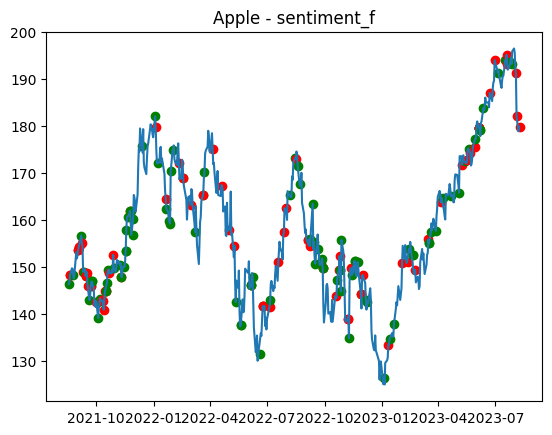

[*********************100%%**********************]  1 of 1 completed


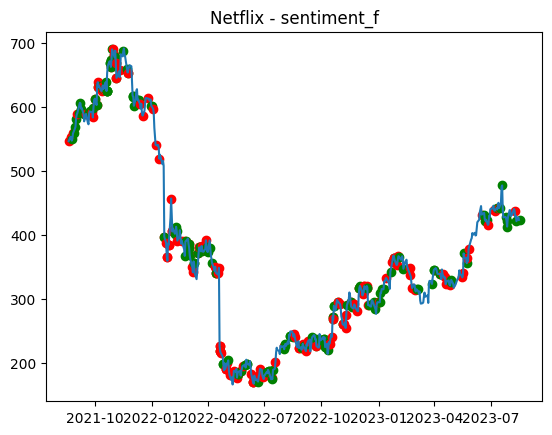

[*********************100%%**********************]  1 of 1 completed


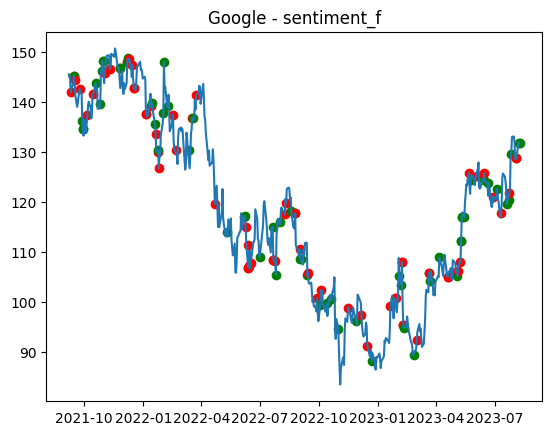

[*********************100%%**********************]  1 of 1 completed


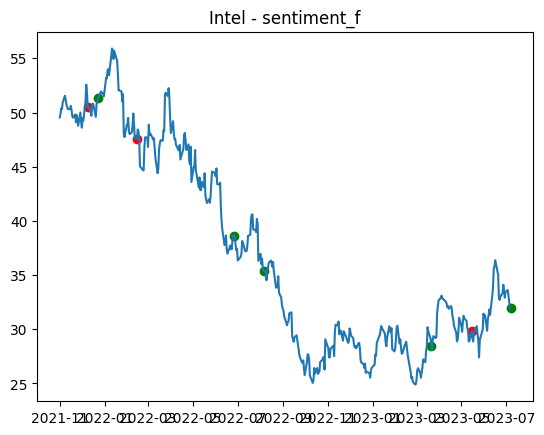

[*********************100%%**********************]  1 of 1 completed


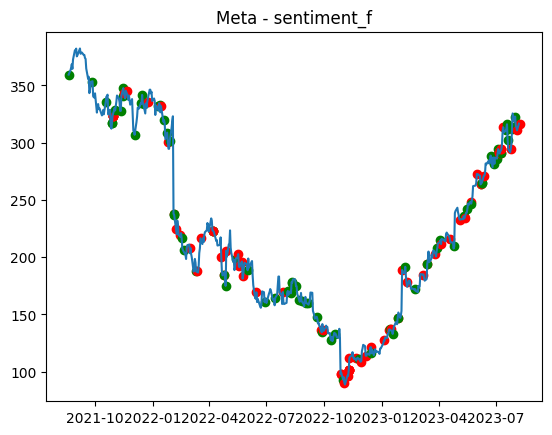

[*********************100%%**********************]  1 of 1 completed


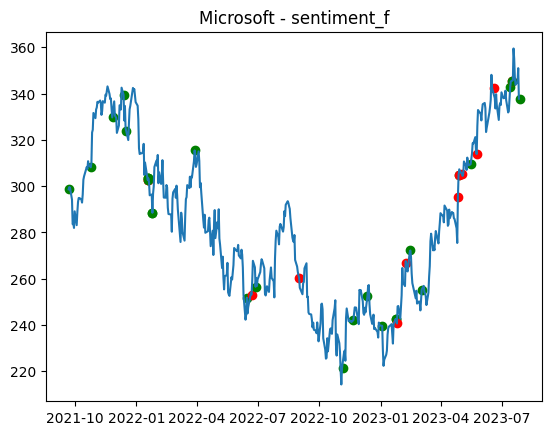

----------------------------------------
Sentiment Column: sentiment_y
----------------------------------------
[*********************100%%**********************]  1 of 1 completed


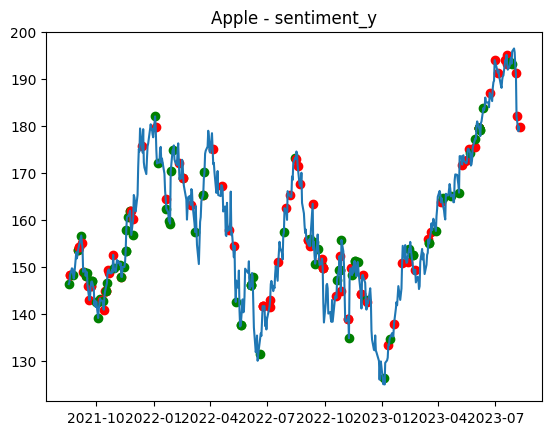

[*********************100%%**********************]  1 of 1 completed


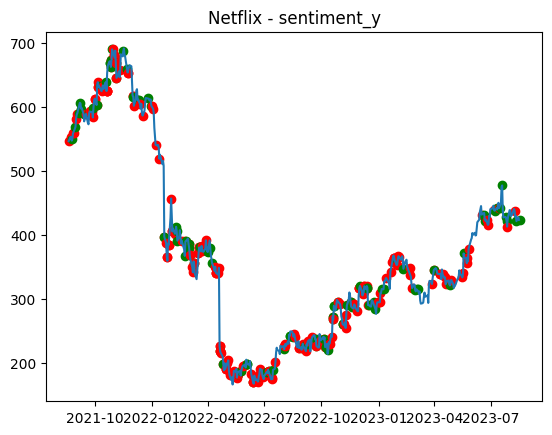

[*********************100%%**********************]  1 of 1 completed


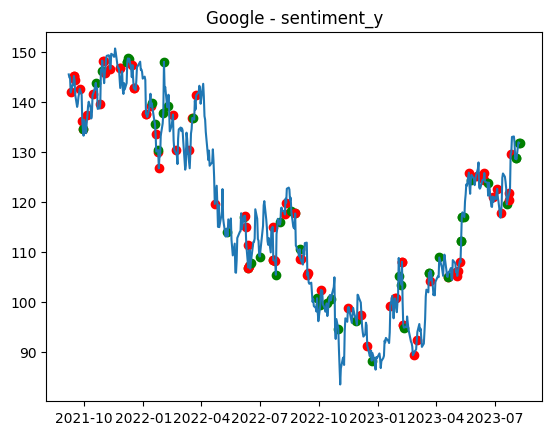

[*********************100%%**********************]  1 of 1 completed


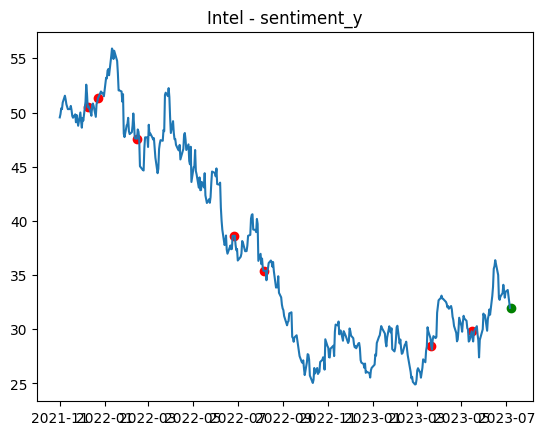

[*********************100%%**********************]  1 of 1 completed


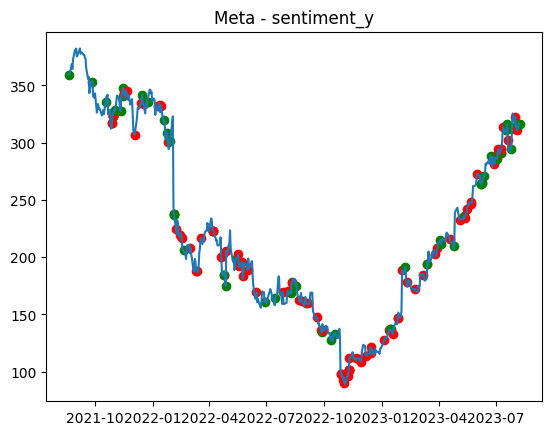

[*********************100%%**********************]  1 of 1 completed


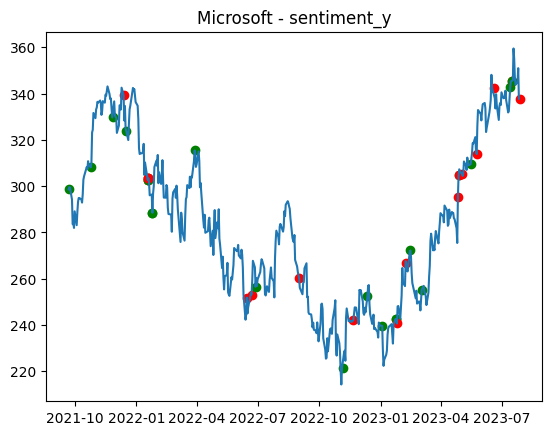

----------------------------------------
Sentiment Column: sentiment_m
----------------------------------------
[*********************100%%**********************]  1 of 1 completed


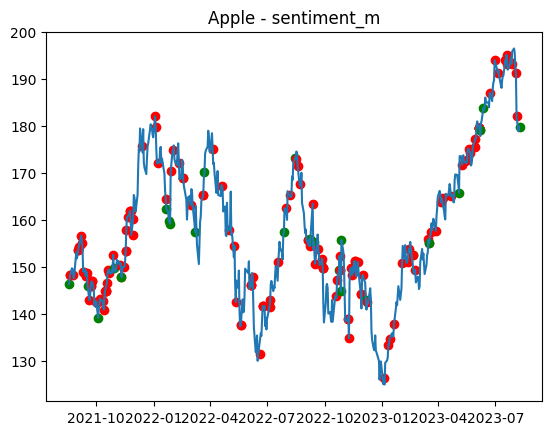

[*********************100%%**********************]  1 of 1 completed


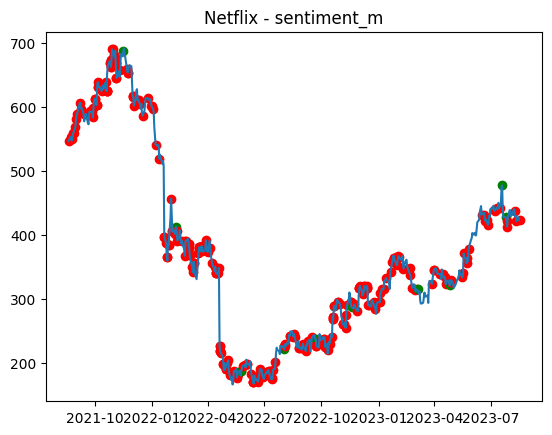

[*********************100%%**********************]  1 of 1 completed


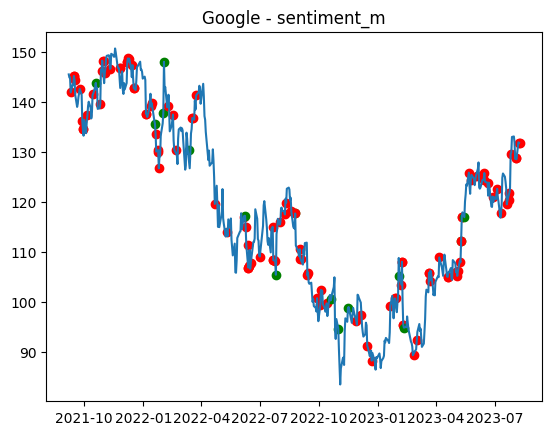

[*********************100%%**********************]  1 of 1 completed


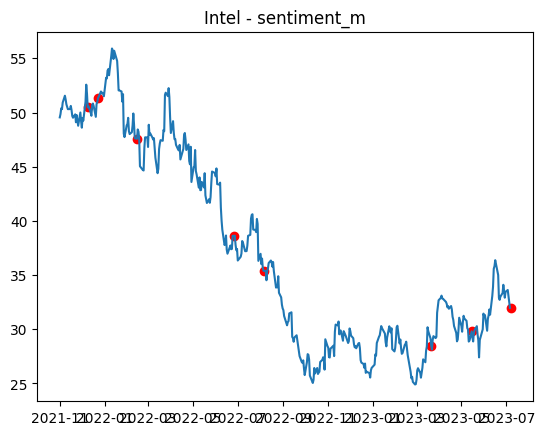

[*********************100%%**********************]  1 of 1 completed


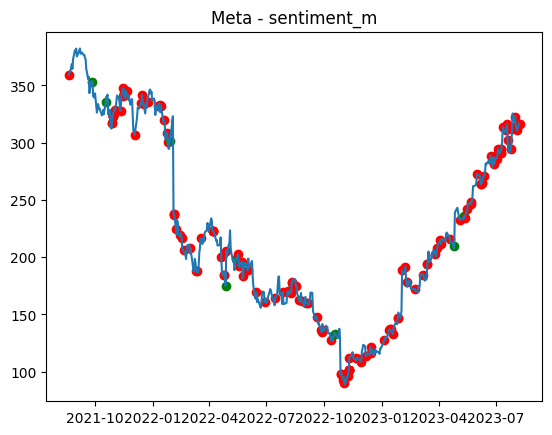

[*********************100%%**********************]  1 of 1 completed


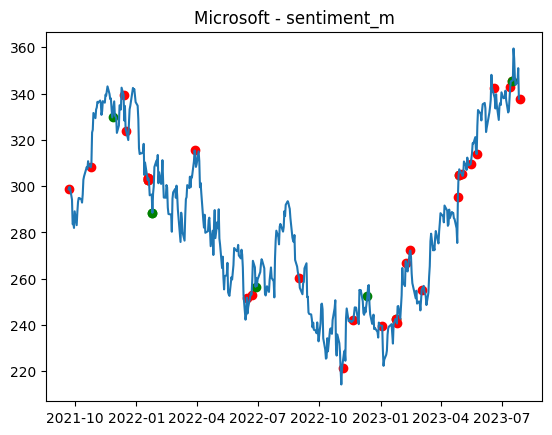

----------------------------------------
Sentiment Column: sentiment_s
----------------------------------------
[*********************100%%**********************]  1 of 1 completed


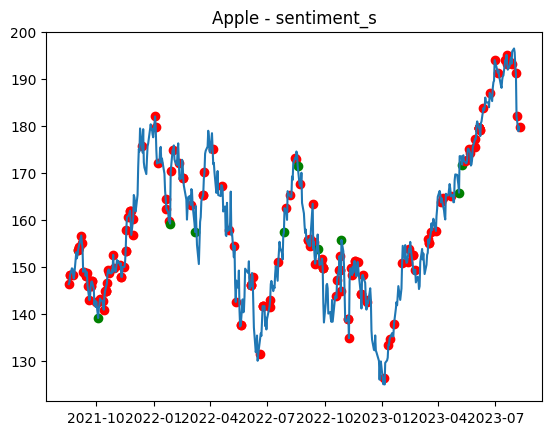

[*********************100%%**********************]  1 of 1 completed


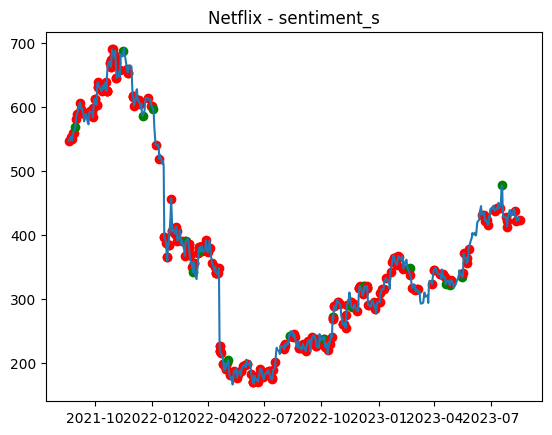

[*********************100%%**********************]  1 of 1 completed


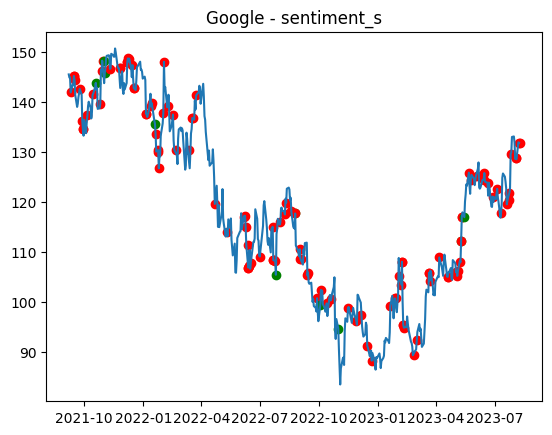

[*********************100%%**********************]  1 of 1 completed


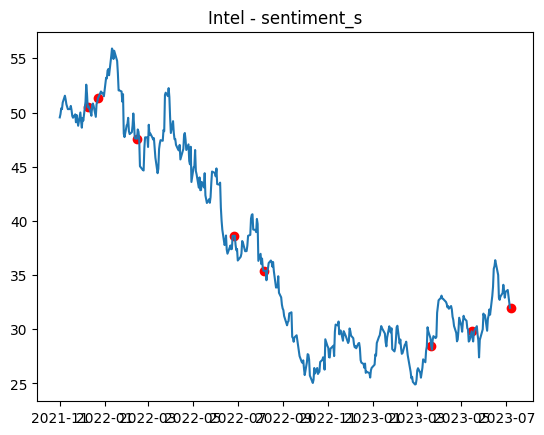

[*********************100%%**********************]  1 of 1 completed


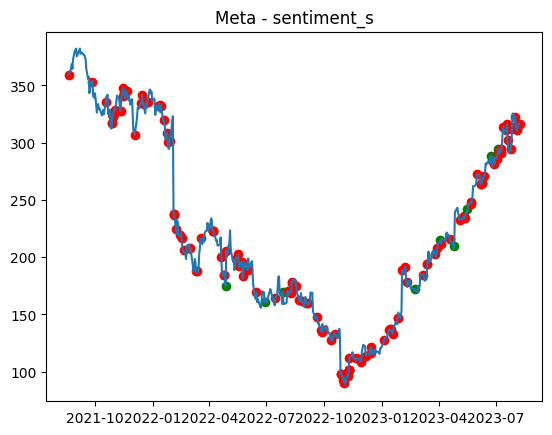

[*********************100%%**********************]  1 of 1 completed


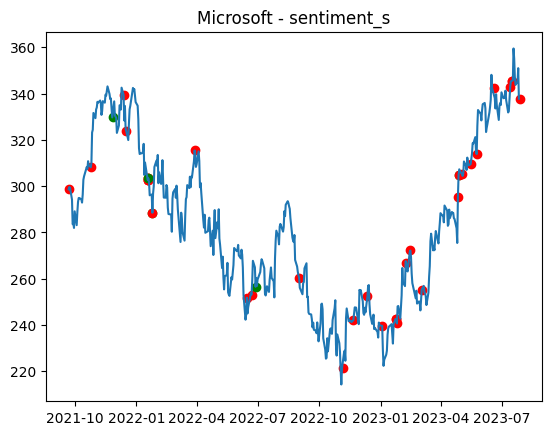

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pytz

# Convert the dates in the 'publisheddate' column to datetime objects
datanew['publisheddate'] = pd.to_datetime(datanew['publisheddate'])

# Assuming you have already created the 'datanew' DataFrame
stocks = ["Apple", "Netflix", "Google", "Intel", "Meta", "Microsoft"]

stock_mapping = {
    "Apple": "AAPL",
    "Netflix": "NFLX",
    "Google": "GOOG",
    "Microsoft": "MSFT",
    "Intel": "INTC",
    "Meta": "META",
}

sentiment_columns = ['sentiment_f', 'sentiment_y', 'sentiment_m', 'sentiment_s']

for sentiment_col in sentiment_columns:
    print("-" * 40)
    print(f"Sentiment Column: {sentiment_col}")
    print("-" * 40)

    for stock in stocks:
        # Filter the data for the current stock
        data = datanew[datanew['Related Stock'] == stock]

        # Fetch stock price data from Yahoo Finance
        start_date = data['publisheddate'].min()
        end_date = data['publisheddate'].max()
        stock_data = yf.download([stock_mapping[stock]], start=start_date, end=end_date)

        # Plot the stock price data
        plt.plot(stock_data['Close'])

        # Add dots for the news articles
        for index, row in data.iterrows():
            date = row['publisheddate']
            sentiment = row[sentiment_col]
            price = stock_data['Close'].asof(date)
            color = 'green' if sentiment == 'Positive' else 'red'
            plt.scatter(date, price, color=color)

        # Show the plot
        plt.title(f"{stock} - {sentiment_col}")
        plt.show()


In [ ]:
correct_sentiment_count = 0
positive_correct_price_change = 0
negative_correct_price_change = 0
total_positive_sentiments = 0
total_negative_sentiments = 0

for sentiment_col in sentiment_columns:
    print("-" * 40)
    print(f"Sentiment Column: {sentiment_col}")
    print("-" * 40)

    for stock in stocks:
        # Filter the data for the current stock
        data = datanew[datanew['Related Stock'] == stock]

        # Fetch stock price data from Yahoo Finance
        start_date = data['publisheddate'].min()
        end_date = data['publisheddate'].max()
        stock_data = yf.download([stock_mapping[stock]], start=start_date, end=end_date)

        # Loop through data
        for index, row in data.iterrows():
            date = row['publisheddate']
            sentiment = row[sentiment_col]
            price = stock_data['Close'].asof(date)
            next_price = stock_data['Close'].asof(date + pd.DateOffset(days=1))

            if sentiment == 'Positive':
                total_positive_sentiments += 1
                if next_price >= price * 1.01:
                    positive_correct_price_change += 1
                    correct_sentiment_count += 1
            elif sentiment == 'Negative':
                total_negative_sentiments += 1
                if next_price <= price * 0.99:
                    negative_correct_price_change += 1
                    correct_sentiment_count += 1

    # Calculate percentages for the current sentiment column
    total_sentiments = total_positive_sentiments + total_negative_sentiments
    correct_sentiment_percentage = (correct_sentiment_count / total_sentiments) * 100
    positive_correct_price_change_percentage = (positive_correct_price_change / total_positive_sentiments) * 100
    negative_correct_price_change_percentage = (negative_correct_price_change / total_negative_sentiments) * 100

    print(f"Percentage of correct sentiment analysis: {correct_sentiment_percentage:.2f}%")
    print(f"Percentage of positive sentiment with at least 1% price increase: {positive_correct_price_change_percentage:.2f}%")
    print(f"Percentage of negative sentiment with at least 1% price decrease: {negative_correct_price_change_percentage:.2f}%")


----------------------------------------
Sentiment Column: sentiment_f
----------------------------------------
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Percentage of correct sentiment analysis: 25.00%
Percentage of positive sentiment with at least 1% price increase: 24.66%
Percentage of negative sentiment with at least 1% price decrease: 25.41%
----------------------------------------
Sentiment Column: sentiment_y
----------------------------------------
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**

In [ ]:
import pandas as pd
majority_voting = pd.read_csv("/content/NewDataset.csv")
majority_voting
# List of columns containing sentiment labels from the models
model_columns = ['sentiment_f', 'sentiment_y', 'sentiment_m', 'sentiment_s']

# Create a new column for majority voted sentiment
majority_voting['majority_voted_sentiment'] = majority_voting[model_columns].mode(axis=1).iloc[:, 0]

# Print the updated DataFrame
majority_voting

In [ ]:
# Define the desired order of columns
new_column_order = ["Related Stock", "cleaned_text",	"publisheddate", 'sentiment_f', 'sentiment_y', 'sentiment_m', 'sentiment_s', 'majority_voted_sentiment',"before",	"now", "after"]

# Reorder the columns
majority_voting = majority_voting[new_column_order]

In [ ]:
# Define the path for the new Excel file
output_excel_path = "/content/majority_voting_results.xlsx"
majority_voting.to_excel(output_excel_path, index=False)

In [ ]:
import pandas as pd
new_dataset = pd.read_excel("majority_voting_results.xlsx")
new_dataset

Related Stock                                       cleaned_text  \
0           Apple  australian watchdog considers regulating apple...   
1            Meta  aristotle ariana grande expanding meaning meta...   
2           Apple       apple refuse refund sister ran £ bill bundle   
3         Netflix  sweet girl review jason momoas netflix action ...   
4           Apple  apple delay return corporate office covid case...   
..            ...                                                ...   
885         Apple    decade disastrous launch apple map finally good   
886        Google  google universal music working licensing voice...   
887       Netflix  heart stone review netflixs mission impossible...   
888       Unknown  limp bizkit review nu metal elder still rock p...   
889       Netflix  monkey king review lively netflix animation re...   

    publisheddate sentiment_f sentiment_y sentiment_m sentiment_s  \
0      2021-08-18    Positive    Positive    Positive     Neutral   
1      2021-08-20    Positive    Positive     Neutral     Neutral   
2      2021-08-20    Negative    Negative     Neutral     Neutral   
3      2021-08-20    Negative    Negative     Neutral     Neutral   
4      2021-08-20    Negative    Negative     Neutral     Neutral   
..            ...         ...         ...         ...         ...   
885    2023-08-09    Negative    Negative    Positive    Negative   
886    2023-08-09    Positive    Positive     Neutral     Neutral   
887    2023-08-11    Positive    Positive     Neutral     Neutral   
888    2023-08-13    Positive    Positive     Neutral     Neutral   
889    2023-08-16    Positive    Positive     Neutral     Neutral   

    majority_voted_sentiment      before         now       after  
0                   Positive  145.860001  148.889999  149.100006  
1                    Neutral  363.179993  366.559998  358.450012  
2                   Negative  149.100006  151.119995  150.190002  
3                   Negative  515.919983  517.919983  518.909973  
4                   Negative  149.100006  151.119995  150.190002  
..                       ...         ...         ...         ...  
885                 Negative  192.580002  191.169998  181.990005  
886                  Neutral  128.639999  128.770004  128.539993  
887                  Neutral  431.600006  440.760010  438.299988  
888                  Neutral         NaN         NaN         NaN  
889                  Neutral  428.899994  429.980011  421.660004  

[890 rows x 11 columns]

In [ ]:
# Find indices of rows where 'Related Stock' is 'Unknown'
rows_to_drop = new_dataset[new_dataset['Related Stock'].isin(['Unknown', 'Baidu'])].index

# Drop the rows with the specified indices
new_dataset.drop(index=rows_to_drop, inplace=True)


In [ ]:
import pandas as pd

# Assuming new_dataset is your DataFrame containing stock data
# Assuming stocks is your list of stock names

recent_sentiments = []  # store recent sentiments here
recent_sentiments_limit = 2  # only consider the last one sentiment

# Loop over stocks
for stock in stocks:
    initial_balance = 1000  # initial balance in dollars
    fixed_amount = 100

    balance = initial_balance
    stocks_owned = 0  # number of stocks owned

    buy_price = 0
    print("-" * 40)
    print(f"Stock Name: {stock}")
    print("-" * 40)

    # Loop over the DataFrame
    for index, row in new_dataset.iterrows():
        # Check if the "Related Stock" is the current stock
        if row['Related Stock'] == stock:
            recent_sentiments.append(row['sentiment_f'])
            print(recent_sentiments)
            if len(recent_sentiments) > recent_sentiments_limit:
                # If the list is too long, remove the oldest sentiment
                recent_sentiments.pop(0)

            if balance > 0:  # Check if balance is positive before trading
                if row['sentiment_f'] == "Positive":
                    # Buy stocks when sentiment is positive
                    buy_price = row['now']
                    num_stocks_to_buy = fixed_amount / row['now']
                    cost = num_stocks_to_buy * row['now']
                    if balance >= cost:  # Only buy if balance is sufficient
                        balance -= cost
                        stocks_owned += num_stocks_to_buy
                        print(f"Balance {balance} Buying {num_stocks_to_buy} stocks. Total owned: {stocks_owned}")

                if len(set(recent_sentiments)) == 1:
                    sentiment = recent_sentiments[0]

                    if sentiment == "Negative" and stocks_owned > 0:
                        # Sell stocks when sentiment is negative and owned stocks are above threshold
                        num_stocks_to_sell = min(stocks_owned, fixed_amount / row['now'])
                        revenue = num_stocks_to_sell * row['now']
                        balance += revenue
                        stocks_owned -= num_stocks_to_sell
                        print(f"Selling {num_stocks_to_sell} stocks for ${revenue}. Total owned: {stocks_owned}")

                if stocks_owned > 0 and row['now'] < 0.95 * buy_price:
                    revenue = stocks_owned * row['now']
                    balance += revenue
                    print(f"Selling all stocks due to 5% price drop for ${revenue}. Total owned: 0")
                    stocks_owned = 0

    final_balance = balance + stocks_owned * new_dataset.iloc[-1]['now']
    print(f"Final balance for {stock}: ${final_balance}")
    return_rate = (final_balance - initial_balance) / initial_balance
    print(f"Return rate for {stock}: {return_rate * 100}%")



----------------------------------------
Stock Name: Apple
----------------------------------------
['Positive']
Balance 900.0 Buying 0.6716367815832801 stocks. Total owned: 0.6716367815832801
['Positive', 'Negative']
['Positive', 'Negative', 'Negative']
Selling 0.6617258022173307 stocks for $100.0. Total owned: 0.009910979365949424
['Negative', 'Negative', 'Positive']
Balance 900.0 Buying 0.6816632725308195 stocks. Total owned: 0.6915742518967689
['Negative', 'Positive', 'Negative']
['Positive', 'Negative', 'Negative']
Selling 0.6729474824539337 stocks for $100.0. Total owned: 0.018626769442835256
['Negative', 'Negative', 'Negative']
Selling 0.018626769442835256 stocks for $2.852130846135912. Total owned: 0.0
['Negative', 'Negative', 'Negative']
['Negative', 'Negative', 'Positive']
Balance 902.8521308461359 Buying 0.6556947321607682 stocks. Total owned: 0.6556947321607682
['Negative', 'Positive', 'Negative']
['Positive', 'Negative', 'Negative']
Selling 0.6382028109125516 stocks for $1

----------------------------------------
Sentiment Column: sentiment_f
----------------------------------------
[*********************100%%**********************]  1 of 1 completed


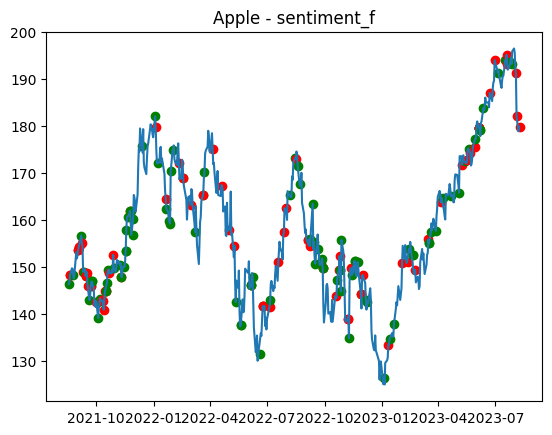

[*********************100%%**********************]  1 of 1 completed


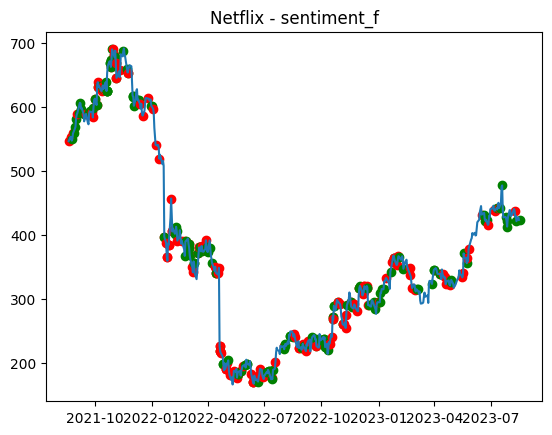

[*********************100%%**********************]  1 of 1 completed


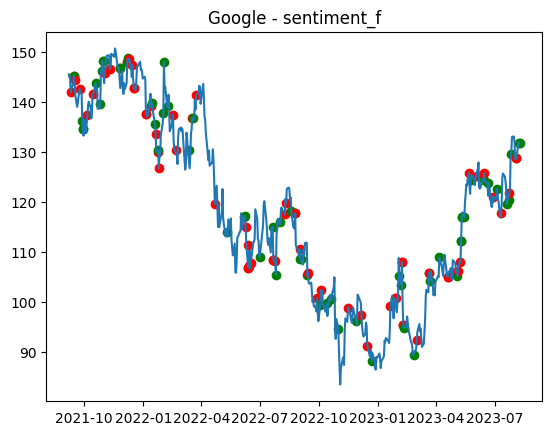

[*********************100%%**********************]  1 of 1 completed


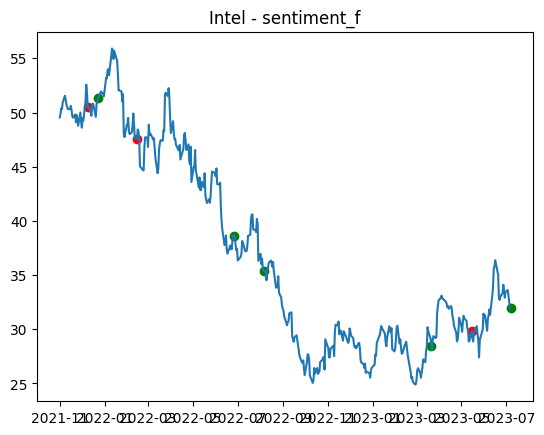

[*********************100%%**********************]  1 of 1 completed


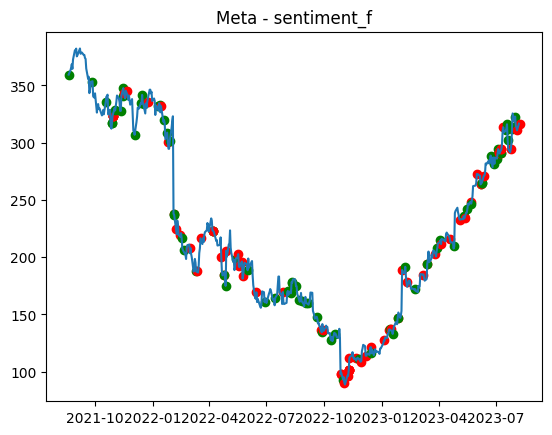

[*********************100%%**********************]  1 of 1 completed


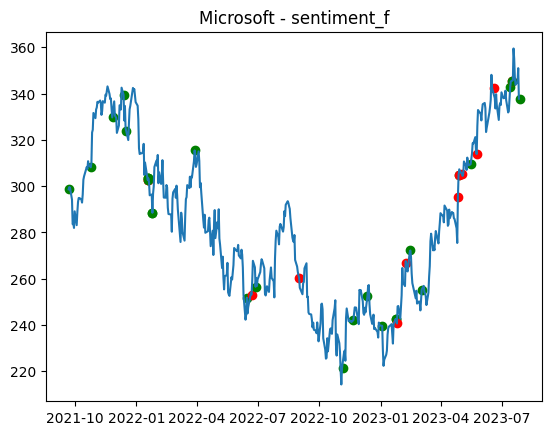

----------------------------------------
Sentiment Column: sentiment_y
----------------------------------------
[*********************100%%**********************]  1 of 1 completed


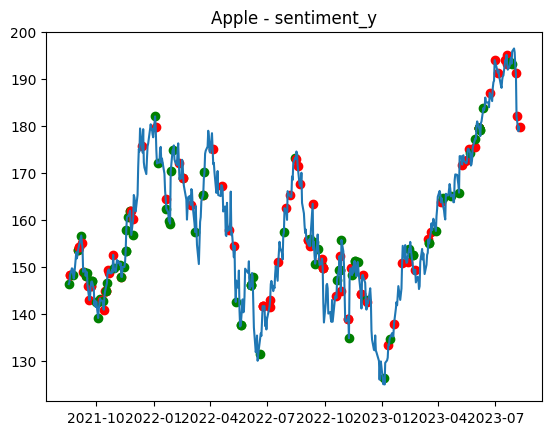

[*********************100%%**********************]  1 of 1 completed


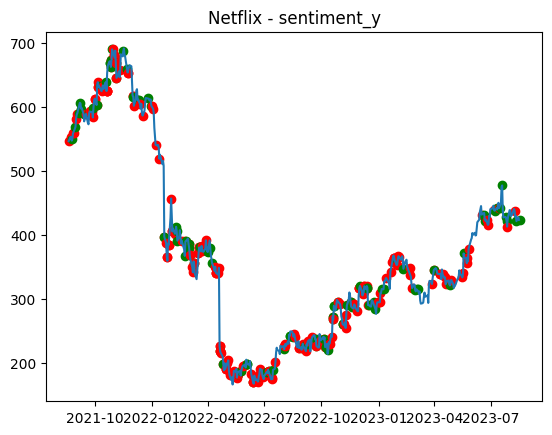

[*********************100%%**********************]  1 of 1 completed


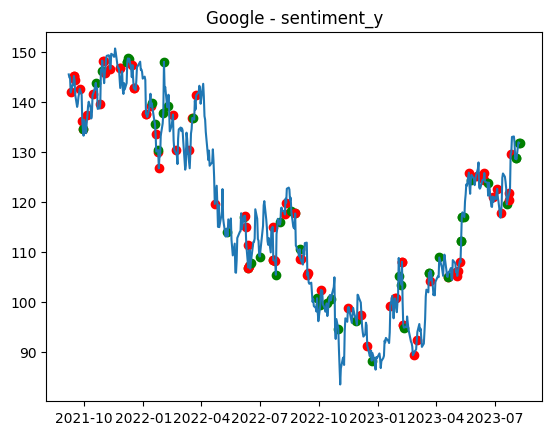

[*********************100%%**********************]  1 of 1 completed


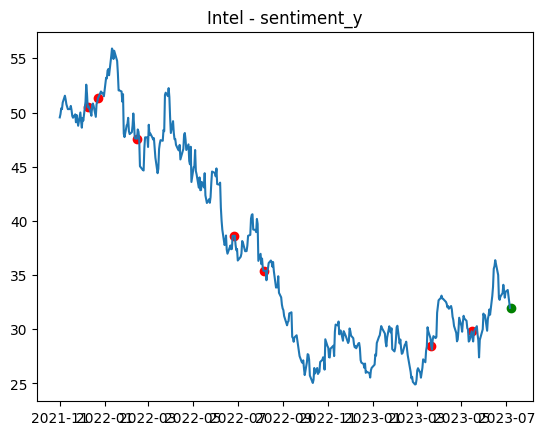

[*********************100%%**********************]  1 of 1 completed


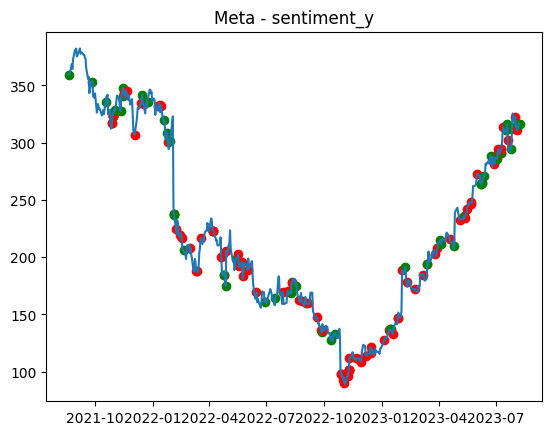

[*********************100%%**********************]  1 of 1 completed


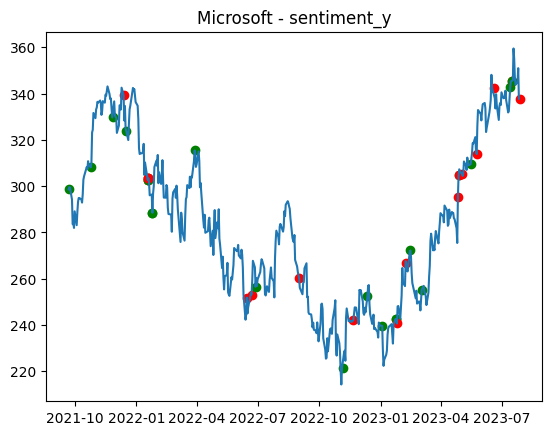

----------------------------------------
Sentiment Column: sentiment_m
----------------------------------------
[*********************100%%**********************]  1 of 1 completed


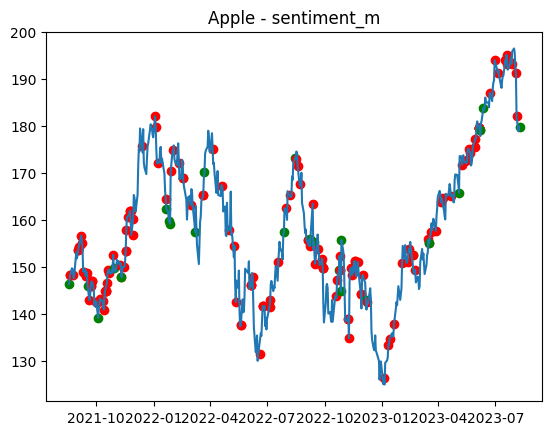

[*********************100%%**********************]  1 of 1 completed


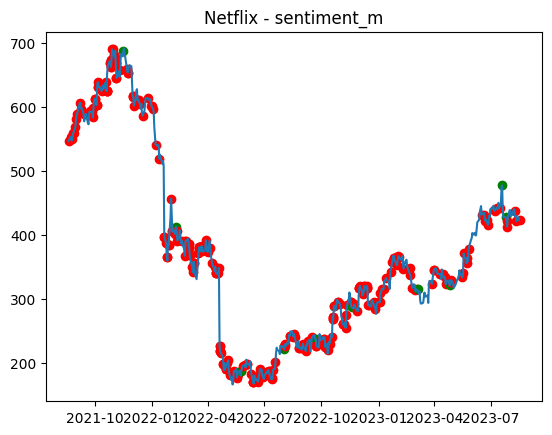

[*********************100%%**********************]  1 of 1 completed


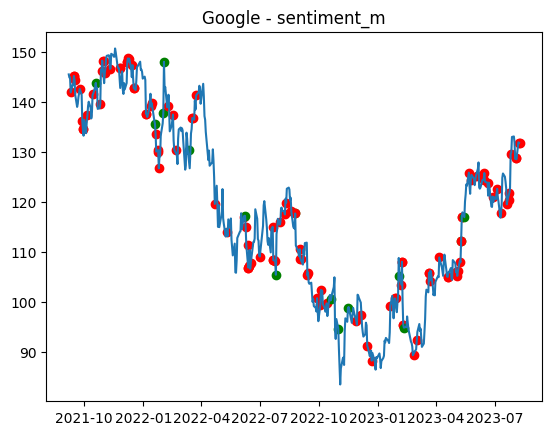

[*********************100%%**********************]  1 of 1 completed


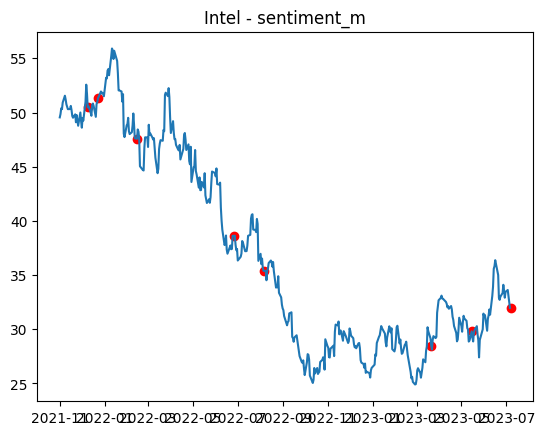

[*********************100%%**********************]  1 of 1 completed


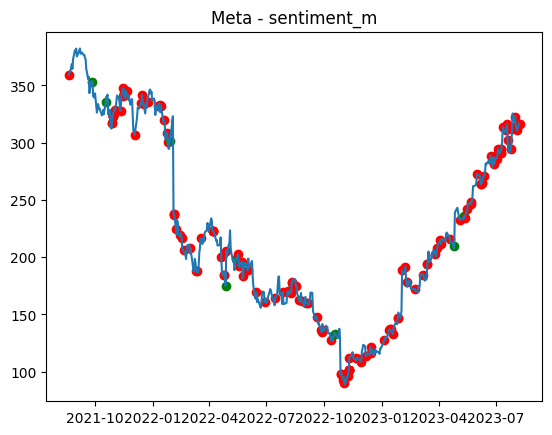

[*********************100%%**********************]  1 of 1 completed


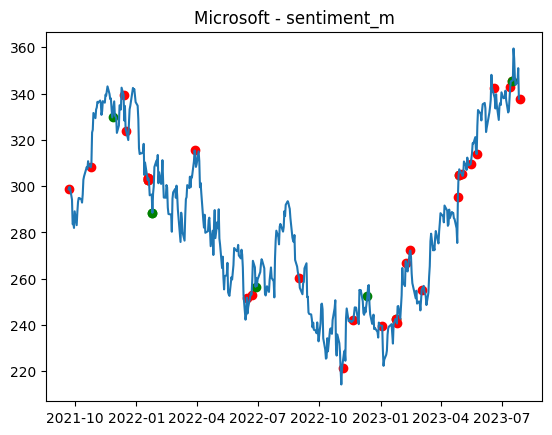

----------------------------------------
Sentiment Column: sentiment_s
----------------------------------------
[*********************100%%**********************]  1 of 1 completed


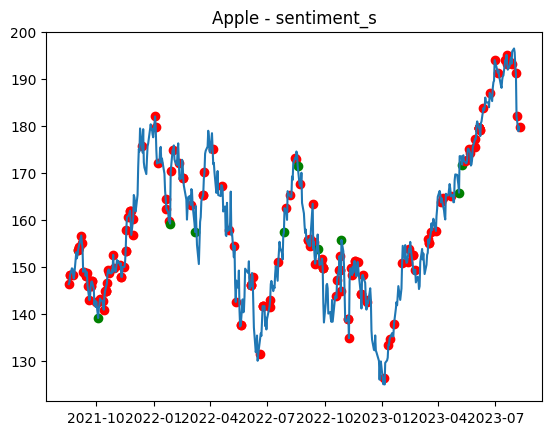

[*********************100%%**********************]  1 of 1 completed


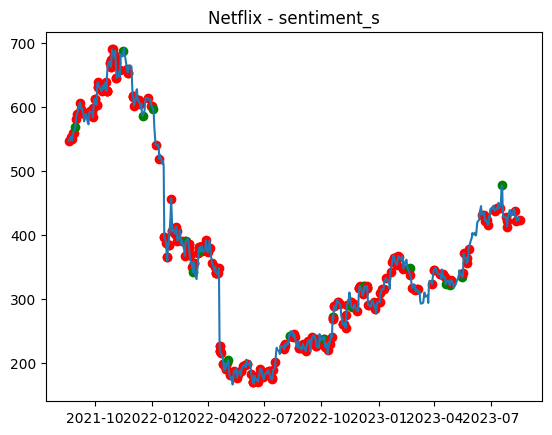

[*********************100%%**********************]  1 of 1 completed


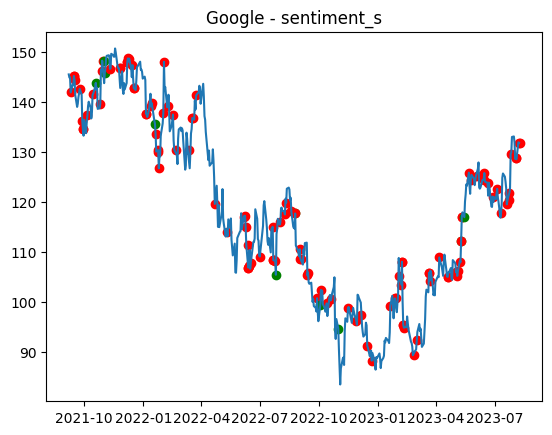

[*********************100%%**********************]  1 of 1 completed


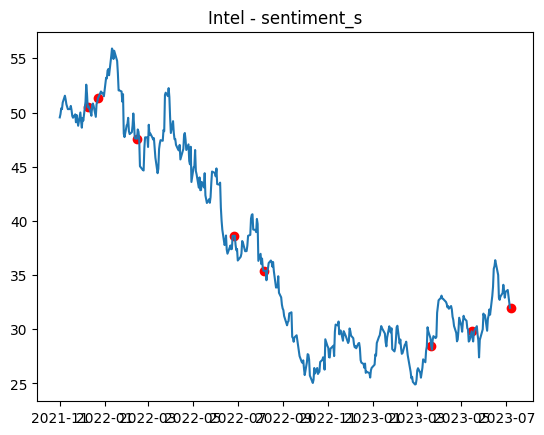

[*********************100%%**********************]  1 of 1 completed


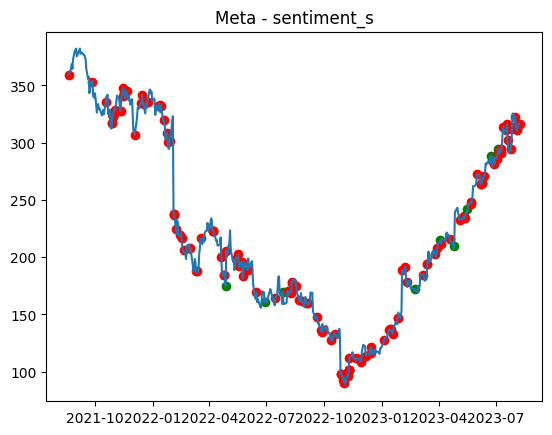

[*********************100%%**********************]  1 of 1 completed


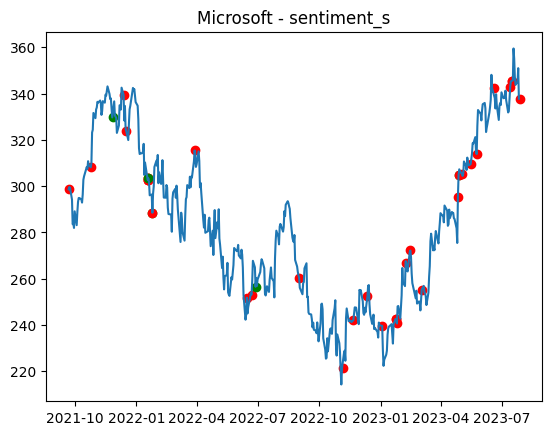

----------------------------------------
Sentiment Column: majority_voted_sentiment
----------------------------------------
[*********************100%%**********************]  1 of 1 completed


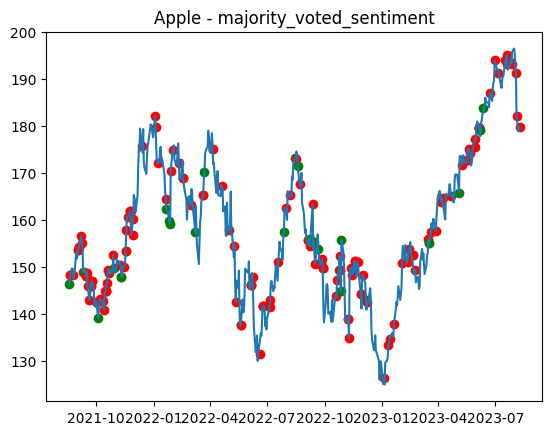

[*********************100%%**********************]  1 of 1 completed


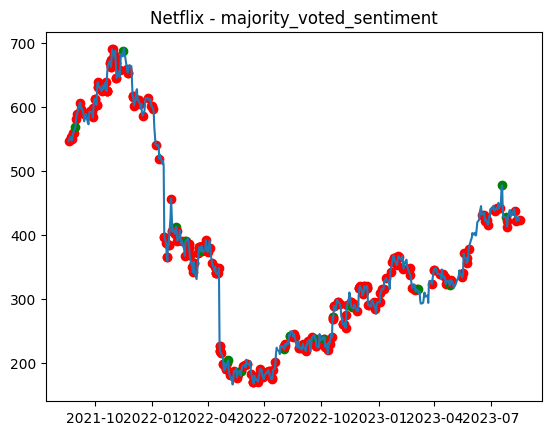

[*********************100%%**********************]  1 of 1 completed


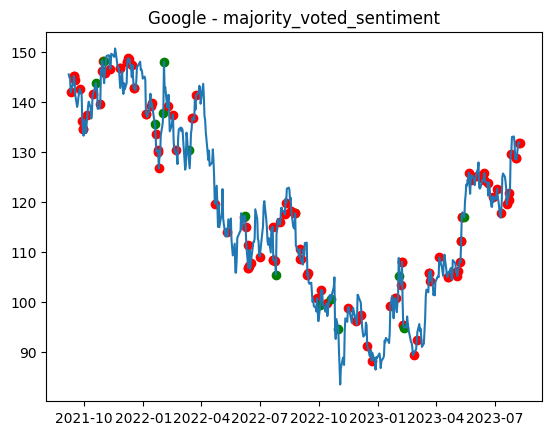

[*********************100%%**********************]  1 of 1 completed


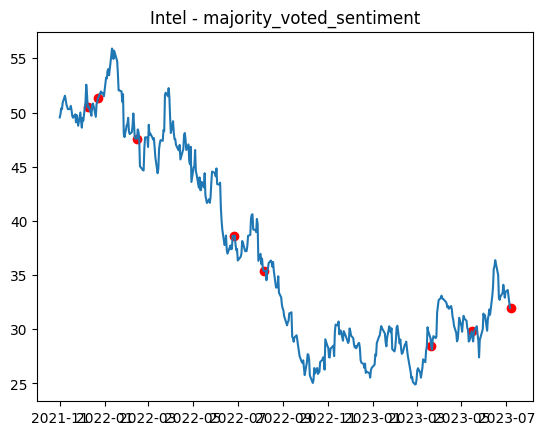

[*********************100%%**********************]  1 of 1 completed


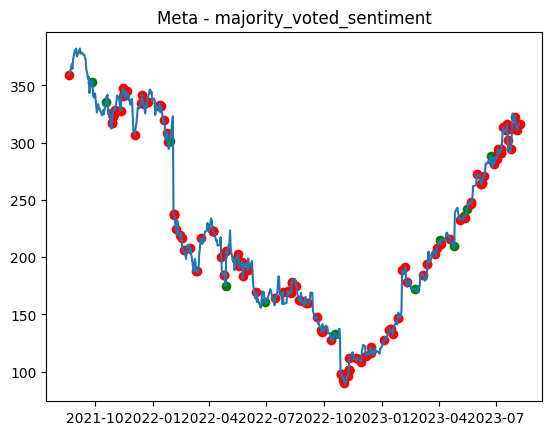

[*********************100%%**********************]  1 of 1 completed


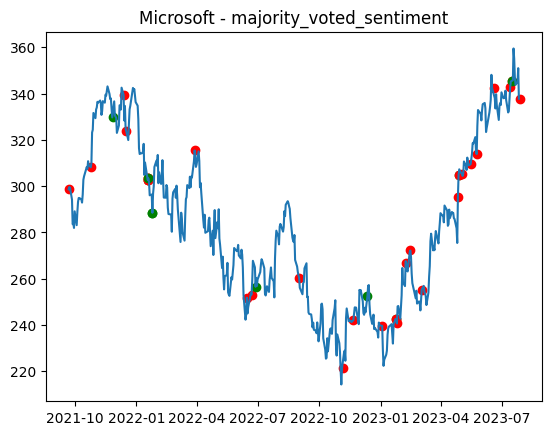

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pytz

# Convert the dates in the 'publisheddate' column to datetime objects
new_dataset['publisheddate'] = pd.to_datetime(new_dataset['publisheddate'])

# Assuming you have already created the 'datanew' DataFrame
stocks = ["Apple", "Netflix", "Google", "Intel", "Meta", "Microsoft"]

stock_mapping = {
    "Apple": "AAPL",
    "Netflix": "NFLX",
    "Google": "GOOG",
    "Microsoft": "MSFT",
    "Intel": "INTC",
    "Meta": "META",
}

sentiment_columns = ['sentiment_f', 'sentiment_y', 'sentiment_m', 'sentiment_s', 'majority_voted_sentiment']

for sentiment_col in sentiment_columns:
    print("-" * 40)
    print(f"Sentiment Column: {sentiment_col}")
    print("-" * 40)

    for stock in stocks:
        # Filter the data for the current stock
        data = new_dataset[new_dataset['Related Stock'] == stock]

        # Fetch stock price data from Yahoo Finance
        start_date = data['publisheddate'].min()
        end_date = data['publisheddate'].max()
        stock_data = yf.download([stock_mapping[stock]], start=start_date, end=end_date)

        # Plot the stock price data
        plt.plot(stock_data['Close'])

        # Add dots for the news articles
        for index, row in data.iterrows():
            date = row['publisheddate']
            sentiment = row[sentiment_col]
            price = stock_data['Close'].asof(date)
            color = 'green' if sentiment == 'Positive' else 'red'
            plt.scatter(date, price, color=color)

        # Show the plot
        plt.title(f"{stock} - {sentiment_col}")
        plt.show()

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import timedelta

# Load your CSV data into the 'new_dataset' DataFrame
# Assuming the new_dataset DataFrame is loaded here
# Assuming you have already created the 'datanew' DataFrame
stocks = ["Apple", "Netflix", "Google", "Intel", "Meta", "Microsoft"]
initial_balance_per_stock = 1000  # initial balance in dollars for each stock
total_initial_balance = 6000  # total initial balance for all stocks combined

stock_data = {stock: {'balance': initial_balance_per_stock, 'stocks_owned': 0} for stock in stocks}

recent_sentiments = []  # store recent sentiments here
recent_sentiments_limit = 2  # only consider the last two sentiments

fixed_amount = 100
buy_price = 0

newlistsell = []  # store selling dates
newlistbuy = []

# Loop over the DataFrame
sentiment_columns = ['sentiment_f', 'sentiment_y', 'sentiment_m', 'sentiment_s', 'majority_voted_sentiment']

for sentiment_col in sentiment_columns:
    print("-" * 40)
    print(f"Sentiment Column: {sentiment_col}")
    print("-" * 40)
    for index, row in new_dataset.iterrows():
        stock = row['Related Stock']

        recent_sentiments.append(row[sentiment_col])
        print(recent_sentiments)
        if len(recent_sentiments) > recent_sentiments_limit:
            recent_sentiments.pop(0)

        if row[sentiment_col] == "Positive" and stock_data[stock]['balance'] > 0:
            buy_price = row['now']
            num_stocks_to_buy = fixed_amount / buy_price
            cost = num_stocks_to_buy * buy_price
            stock_data[stock]['balance'] -= cost
            stock_data[stock]['stocks_owned'] += num_stocks_to_buy

            print(f"Buying {num_stocks_to_buy} stocks for ${cost}. Total owned: {stock_data[stock]['stocks_owned']}")
            newlistbuy.append(row['publisheddate'])

        if len(set(recent_sentiments)) == 1:
            sentiment = recent_sentiments[0]

            # Check if the stock price has increased by at least 1% within a week
            week_ago_index = index - 7
            if week_ago_index >= 0 and week_ago_index < len(new_dataset.index):
                week_ago_price = new_dataset.loc[new_dataset.index[week_ago_index]]['now']
                if row['now'] >= 1.01 * week_ago_price:
                    continue  # Skip selling if there's at least 1% increase within a week


            if sentiment == "Negative" and stock_data[stock]['stocks_owned'] > 0:
                num_stocks_to_sell = min(stock_data[stock]['stocks_owned'], fixed_amount / row['now'])
                revenue = num_stocks_to_sell * row['now']
                stock_data[stock]['balance'] += revenue
                stock_data[stock]['stocks_owned'] -= num_stocks_to_sell

                print(f"Selling {num_stocks_to_sell} stocks for ${revenue}. Total owned: {stock_data[stock]['stocks_owned']}")
                newlistsell.append(row['publisheddate'])

        if stock_data[stock]['stocks_owned'] > 0 and row['now'] < 0.95 * buy_price:
            revenue = stock_data[stock]['stocks_owned'] * row['now']
            stock_data[stock]['balance'] += revenue
            stock_data[stock]['stocks_owned'] = 0

            print(f"Selling all stocks due to 5% price drop for ${revenue}. Total owned: 0")
            newlistsell.append(row['publisheddate'])

    # Calculate final balance for each stock and total final balance
    final_balances = {stock: data['balance'] + data['stocks_owned'] * new_dataset[new_dataset['Related Stock'] == stock].iloc[-1]['now'] for stock, data in stock_data.items()}
    total_final_balance = sum(final_balances.values())

    # Calculate return rate for each stock and overall return rate
    return_rates = {stock: (final_balances[stock] - initial_balance_per_stock) / initial_balance_per_stock for stock in stocks}
    overall_return_rate = (total_final_balance - total_initial_balance) / total_initial_balance

    for stock in stocks:
        print(f"Final balance for {stock}: ${final_balances[stock]}, Return rate: {return_rates[stock]*100}%")

    print(f"Total final balance for {sentiment_col}: ${total_final_balance}, Overall return rate: {overall_return_rate*100}%")


Görüntülenen çıkış son 5000 satıra kısaltıldı.
['Positive', 'Positive', 'Positive']
Buying 0.7046719570108816 stocks for $100.0. Total owned: 3.4931825160312338
['Positive', 'Positive', 'Negative']
['Positive', 'Negative', 'Positive']
['Negative', 'Positive', 'Negative']
['Positive', 'Negative', 'Negative']
Selling 0.7503817402224582 stocks for $100.0. Total owned: 2.059388023598805
Selling all stocks due to 5% price drop for $274.4453806922699. Total owned: 0
['Negative', 'Negative', 'Positive']
Buying 0.701016503881284 stocks for $100.0. Total owned: 4.194199019912518
['Negative', 'Positive', 'Positive']
['Positive', 'Positive', 'Negative']
['Positive', 'Negative', 'Positive']
Buying 0.7187005924871356 stocks for $100.0. Total owned: 4.912899612399654
['Negative', 'Positive', 'Negative']
['Positive', 'Negative', 'Positive']
['Negative', 'Positive', 'Negative']
['Positive', 'Negative', 'Negative']
Selling 0.15647004196537223 stocks for $100.00000000000001. Total owned: 1.5943206810848

In [ ]:

stock_data = {stock: {'balance': initial_balance_per_stock, 'stocks_owned': 0} for stock in stocks}

recent_sentiments = []  # store recent sentiments here
recent_sentiments_limit = 2  # only consider the last two sentiments

fixed_amount = 100
buy_price = 0

newlistsell = []  # store selling dates
newlistbuy = []


for sentiment_col in sentiment_columns:
    print("-" * 40)
    print(f"Sentiment Column: {sentiment_col}")
    print("-" * 40)
    for index, row in new_dataset.iterrows():
        stock = row['Related Stock']

        recent_sentiments.append(row[sentiment_col])
        if len(recent_sentiments) > recent_sentiments_limit:
            recent_sentiments.pop(0)

        if row[sentiment_col] == "Positive" and stock_data[stock]['balance'] > 0:
            buy_price = row['now']
            num_stocks_to_buy = fixed_amount / buy_price
            cost = num_stocks_to_buy * buy_price
            stock_data[stock]['balance'] -= cost
            stock_data[stock]['stocks_owned'] += num_stocks_to_buy

        if len(set(recent_sentiments)) == 1:
            sentiment = recent_sentiments[0]

            # Check if the stock price has increased by at least 1% within a week
            week_ago_index = index - 7
            if week_ago_index >= 0 and week_ago_index < len(new_dataset.index):
                week_ago_price = new_dataset.loc[new_dataset.index[week_ago_index]]['now']
                if row['now'] >= 1.01 * week_ago_price:
                    continue  # Skip selling if there's at least 1% increase within a week

            if sentiment == "Negative" and stock_data[stock]['stocks_owned'] > 0:
                num_stocks_to_sell = min(stock_data[stock]['stocks_owned'], fixed_amount / row['now'])
                revenue = num_stocks_to_sell * row['now']
                stock_data[stock]['balance'] += revenue
                stock_data[stock]['stocks_owned'] -= num_stocks_to_sell

        if stock_data[stock]['stocks_owned'] > 0 and row['now'] < 0.95 * buy_price:
            revenue = stock_data[stock]['stocks_owned'] * row['now']
            stock_data[stock]['balance'] += revenue
            stock_data[stock]['stocks_owned'] = 0


    # Calculate final balance for each stock and total final balance
    final_balances = {stock: data['balance'] + data['stocks_owned'] * new_dataset[new_dataset['Related Stock'] == stock].iloc[-1]['now'] for stock, data in stock_data.items()}
    total_final_balance = sum(final_balances.values())

    # Calculate return rate for each stock and overall return rate
    return_rates = {stock: (final_balances[stock] - initial_balance_per_stock) / initial_balance_per_stock for stock in stocks}
    overall_return_rate = (total_final_balance - total_initial_balance) / total_initial_balance

    for stock in stocks:
        print(f"Final balance for {stock}: ${final_balances[stock]}, Return rate: {return_rates[stock]*100}%")

    print(f"Total final balance for {sentiment_col}: ${total_final_balance}, Overall return rate: {overall_return_rate*100}%")



----------------------------------------
Sentiment Column: sentiment_f
----------------------------------------
Final balance for Apple: $1315.202066451216, Return rate: 31.520206645121608%
Final balance for Netflix: $693.5556866824338, Return rate: -30.644431331756618%
Final balance for Google: $1039.33220977665, Return rate: 3.933220977664996%
Final balance for Intel: $966.48519500655, Return rate: -3.3514804993449956%
Final balance for Meta: $928.7190876500341, Return rate: -7.128091234996589%
Final balance for Microsoft: $1096.9414932298882, Return rate: 9.694149322988824%
Total final balance for sentiment_f: $6040.235738796771, Overall return rate: 0.6705956466128555%
----------------------------------------
Sentiment Column: sentiment_y
----------------------------------------
Final balance for Apple: $1192.59955818677, Return rate: 19.259955818677007%
Final balance for Netflix: $715.9819231698243, Return rate: -28.401807683017573%
Final balance for Google: $1174.8698927364053, R

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import timedelta

# Define stock symbols and initial balance
stocks = ["Apple", "Netflix", "Google", "Intel", "Meta", "Microsoft"]
initial_balance_per_stock = 1000  # Initial balance in dollars for each stock
total_initial_balance = initial_balance_per_stock * len(stocks)  # Total initial balance for all stocks combined

# Define stock symbols mapping
stock_mapping = {
    "Apple": "AAPL",
    "Netflix": "NFLX",
    "Google": "GOOG",
    "Microsoft": "MSFT",
    "Intel": "INTC",
    "Meta": "META",
}

# Initialize stock data dictionary
stock_data = {stock: {'balance': initial_balance_per_stock, 'stocks_owned': 0} for stock in stocks}

# Loop over the DataFrame
for stock in stocks:
    stock_symbol = stock_mapping[stock]
    stock_prices = yf.download(stock_symbol, period="2y", progress=False)['Adj Close']
    buy_price = stock_prices.iloc[0]  # Buy at the price from 2 years ago
    num_stocks_to_buy = initial_balance_per_stock / buy_price
    stock_data[stock]['stocks_owned'] = num_stocks_to_buy
    stock_data[stock]['balance'] -= initial_balance_per_stock

# Calculate final balance and return rate for each stock
stock_final_balances = {}
stock_return_rates = {}

for stock in stocks:
    stock_symbol = stock_mapping[stock]
    stock_prices = yf.download(stock_symbol, period="2y", progress=False)['Adj Close']
    final_balance = stock_data[stock]['balance'] + (stock_data[stock]['stocks_owned'] * stock_prices[-1])
    return_rate = ((final_balance - initial_balance_per_stock) / initial_balance_per_stock) * 100

    stock_final_balances[stock] = final_balance
    stock_return_rates[stock] = return_rate

# Calculate overall return rate
overall_return_rate = sum(stock_return_rates.values()) / len(stocks)

# Print the results for each stock
for stock in stocks:
    print(f"Final balance for {stock}: ${stock_final_balances[stock]:.2f}, Return rate: {stock_return_rates[stock]:.2f}%")

# Print the overall results
print(f"Overall return rate for all stocks: {overall_return_rate:.2f}%")


Final balance for Apple: $1202.60, Return rate: 20.26%
Final balance for Netflix: $772.22, Return rate: -22.78%
Final balance for Google: $955.26, Return rate: -4.47%
Final balance for Intel: $666.61, Return rate: -33.34%
Final balance for Meta: $802.05, Return rate: -19.79%
Final balance for Microsoft: $1109.69, Return rate: 10.97%
Overall return rate for all stocks: -8.19%


In [ ]:
import pandas as pd
from datetime import datetime, timedelta

# Load Excel file into a DataFrame
df = pd.read_excel('majority_voting_results.xlsx')

# Convert 'publisheddate' column to datetime
df['publisheddate'] = pd.to_datetime(df['publisheddate'])

# Calculate the start date for the last 1 year
today = datetime.today()
one_year_ago = today - timedelta(days=365)

# Filter DataFrame to include only data within the last 1 year
filtered_df = df[df['publisheddate'] >= one_year_ago]

# Filter out rows containing "Unknown" or "Baidu"
filtered_df = filtered_df[~filtered_df['Related Stock'].isin(['Unknown', 'Baidu'])]

# Save filtered data to a new Excel file
filtered_df.to_excel('1year_data_filtered.xlsx', index=False)


In [ ]:

# Calculate the start date for the last 1.5 years
today = datetime.today()
one_and_half_years_ago = today - timedelta(days=547)  # 365 days/year * 1.5 years = 547.5 days

# Filter DataFrame to include only data within the last 1.5 years
filtered_df = df[df['publisheddate'] >= one_and_half_years_ago]

# Filter out rows containing "Unknown" or "Baidu"
filtered_df = filtered_df[~filtered_df['Related Stock'].isin(['Unknown', 'Baidu'])]

# Save filtered data to a new Excel file
filtered_df.to_excel('1.5_years_data_filtered.xlsx', index=False)

In [ ]:
new_dataset = pd.read_excel("1year_data_filtered.xlsx")
new_dataset

Related Stock                                       cleaned_text  \
0           Apple  apple security flaw actively exploited hacker ...   
1         Netflix  came review hugh bonneville get nasty silly ne...   
2          Google    google modify search algorithm tackle clickbait   
3           Apple  apple worker launch petition firm return offic...   
4            Meta  priti patel urge meta rethink end end encrypti...   
..            ...                                                ...   
380        Google  google say ai system able mine publisher work ...   
381         Apple    decade disastrous launch apple map finally good   
382        Google  google universal music working licensing voice...   
383       Netflix  heart stone review netflixs mission impossible...   
384       Netflix  monkey king review lively netflix animation re...   

    publisheddate sentiment_f sentiment_y sentiment_m sentiment_s  \
0      2022-08-19    Positive    Negative     Neutral    Positive   
1      2022-08-19    Negative    Negative     Neutral     Neutral   
2      2022-08-19    Positive    Positive     Neutral     Neutral   
3      2022-08-22    Positive    Negative     Neutral     Neutral   
4      2022-08-22    Positive    Negative     Neutral     Neutral   
..            ...         ...         ...         ...         ...   
380    2023-08-08    Positive    Positive     Neutral     Neutral   
381    2023-08-09    Negative    Negative    Positive    Negative   
382    2023-08-09    Positive    Positive     Neutral     Neutral   
383    2023-08-11    Positive    Positive     Neutral     Neutral   
384    2023-08-16    Positive    Positive     Neutral     Neutral   

    majority_voted_sentiment      before         now       after  
0                   Positive  172.100006  173.190002  173.029999  
1                   Negative  249.300003  249.110001  245.690002  
2                    Neutral  122.650002  122.879997  122.510002  
3                    Neutral  173.190002  173.029999  174.550003  
4                    Neutral  180.889999  179.470001  174.850006  
..                       ...         ...         ...         ...  
380                  Neutral  131.889999  128.639999  128.770004  
381                 Negative  192.580002  191.169998  181.990005  
382                  Neutral  128.639999  128.770004  128.539993  
383                  Neutral  431.600006  440.760010  438.299988  
384                  Neutral  428.899994  429.980011  421.660004  

[385 rows x 11 columns]

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import timedelta

# Load your CSV data into the 'new_dataset' DataFrame
# Assuming the new_dataset DataFrame is loaded here

initial_balance_per_stock = 1000  # initial balance in dollars for each stock
total_initial_balance = 6000  # total initial balance for all stocks combined

stock_data = {stock: {'balance': initial_balance_per_stock, 'stocks_owned': 0} for stock in stocks}

recent_sentiments = []  # store recent sentiments here
recent_sentiments_limit = 2  # only consider the last two sentiments

fixed_amount = 100
buy_price = 0

newlistsell = []  # store selling dates
newlistbuy = []

# Loop over the DataFrame
sentiment_columns = ['sentiment_f', 'sentiment_y', 'sentiment_m', 'sentiment_s', 'majority_voted_sentiment']

for sentiment_col in sentiment_columns:
    print("-" * 40)
    print(f"Sentiment Column: {sentiment_col}")
    print("-" * 40)
    for index, row in new_dataset.iterrows():
        stock = row['Related Stock']

        recent_sentiments.append(row[sentiment_col])
        print(recent_sentiments)
        if len(recent_sentiments) > recent_sentiments_limit:
            recent_sentiments.pop(0)

        if row[sentiment_col] == "Positive" and stock_data[stock]['balance'] > 0:
            buy_price = row['now']
            num_stocks_to_buy = fixed_amount / buy_price
            cost = num_stocks_to_buy * buy_price
            stock_data[stock]['balance'] -= cost
            stock_data[stock]['stocks_owned'] += num_stocks_to_buy

            print(f"Buying {num_stocks_to_buy} stocks for ${cost}. Total owned: {stock_data[stock]['stocks_owned']}")
            newlistbuy.append(row['publisheddate'])

        if len(set(recent_sentiments)) == 1:
            sentiment = recent_sentiments[0]

            # Check if the stock price has increased by at least 1% within a week
            week_ago_index = index - 7
            if week_ago_index >= 0 and week_ago_index < len(new_dataset.index):
                week_ago_price = new_dataset.loc[new_dataset.index[week_ago_index]]['now']
                if row['now'] >= 1.01 * week_ago_price:
                    continue  # Skip selling if there's at least 1% increase within a week


            if sentiment == "Negative" and stock_data[stock]['stocks_owned'] > 0:
                num_stocks_to_sell = min(stock_data[stock]['stocks_owned'], fixed_amount / row['now'])
                revenue = num_stocks_to_sell * row['now']
                stock_data[stock]['balance'] += revenue
                stock_data[stock]['stocks_owned'] -= num_stocks_to_sell

                print(f"Selling {num_stocks_to_sell} stocks for ${revenue}. Total owned: {stock_data[stock]['stocks_owned']}")
                newlistsell.append(row['publisheddate'])

        if stock_data[stock]['stocks_owned'] > 0 and row['now'] < 0.95 * buy_price:
            revenue = stock_data[stock]['stocks_owned'] * row['now']
            stock_data[stock]['balance'] += revenue
            stock_data[stock]['stocks_owned'] = 0

            print(f"Selling all stocks due to 5% price drop for ${revenue}. Total owned: 0")
            newlistsell.append(row['publisheddate'])

    # Calculate final balance for each stock and total final balance
    final_balances = {stock: data['balance'] + data['stocks_owned'] * new_dataset[new_dataset['Related Stock'] == stock].iloc[-1]['now'] for stock, data in stock_data.items()}
    total_final_balance = sum(final_balances.values())

    # Calculate return rate for each stock and overall return rate
    return_rates = {stock: (final_balances[stock] - initial_balance_per_stock) / initial_balance_per_stock for stock in stocks}
    overall_return_rate = (total_final_balance - total_initial_balance) / total_initial_balance

    for stock in stocks:
        print(f"Final balance for {stock}: ${final_balances[stock]}, Return rate: {return_rates[stock]*100}%")

    print(f"Total final balance for {sentiment_col}: ${total_final_balance}, Overall return rate: {overall_return_rate*100}%")
    print(f"Total final balance for {sentiment_col}: ${total_final_balance}, Overall return rate: {overall_return_rate*100}%")


----------------------------------------
Sentiment Column: sentiment_f
----------------------------------------
['Positive']
Buying 0.5774005346170723 stocks for $100.0. Total owned: 0.5774005346170723
['Positive', 'Negative']
['Positive', 'Negative', 'Positive']
Buying 0.8138021015232276 stocks for $100.0. Total owned: 0.8138021015232276
['Negative', 'Positive', 'Positive']
Buying 0.5779344663092318 stocks for $100.0. Total owned: 1.1553350009263041
['Positive', 'Positive', 'Positive']
Buying 0.5571961849881812 stocks for $100.0. Total owned: 0.5571961849881812
['Positive', 'Positive', 'Positive']
Buying 0.8465966616555439 stocks for $100.0. Total owned: 1.6603987631787716
['Positive', 'Positive', 'Negative']
['Positive', 'Negative', 'Negative']
['Negative', 'Negative', 'Positive']
Buying 0.6133087895021779 stocks for $100.0. Total owned: 1.1705049744903593
['Negative', 'Positive', 'Negative']
['Positive', 'Negative', 'Negative']
['Negative', 'Negative', 'Positive']
Buying 0.427386963

In [ ]:
stock_mapping = {
    "Apple": "AAPL",
    "Netflix": "NFLX",
    "Google": "GOOG",
    "Microsoft": "MSFT",
    "Intel": "INTC",
    "Meta": "META",
}
stock_data = {stock: {'balance': initial_balance_per_stock, 'stocks_owned': 0} for stock in stocks}

recent_sentiments = []  # store recent sentiments here
recent_sentiments_limit = 2  # only consider the last two sentiments

fixed_amount = 100
buy_price = 0

newlistsell = []  # store selling dates
newlistbuy = []


for sentiment_col in sentiment_columns:
    print("-" * 40)
    print(f"Sentiment Column: {sentiment_col}")
    print("-" * 40)
    for index, row in new_dataset.iterrows():
        stock = row['Related Stock']

        recent_sentiments.append(row[sentiment_col])
        if len(recent_sentiments) > recent_sentiments_limit:
            recent_sentiments.pop(0)

        if row[sentiment_col] == "Positive" and stock_data[stock]['balance'] > 0:
            buy_price = row['now']
            num_stocks_to_buy = fixed_amount / buy_price
            cost = num_stocks_to_buy * buy_price
            stock_data[stock]['balance'] -= cost
            stock_data[stock]['stocks_owned'] += num_stocks_to_buy

        if len(set(recent_sentiments)) == 1:
            sentiment = recent_sentiments[0]

            # Check if the stock price has increased by at least 1% within a week
            week_ago_index = index - 7
            if week_ago_index >= 0 and week_ago_index < len(new_dataset.index):
                week_ago_price = new_dataset.loc[new_dataset.index[week_ago_index]]['now']
                if row['now'] >= 1.01 * week_ago_price:
                    continue  # Skip selling if there's at least 1% increase within a week

            if sentiment == "Negative" and stock_data[stock]['stocks_owned'] > 0:
                num_stocks_to_sell = min(stock_data[stock]['stocks_owned'], fixed_amount / row['now'])
                revenue = num_stocks_to_sell * row['now']
                stock_data[stock]['balance'] += revenue
                stock_data[stock]['stocks_owned'] -= num_stocks_to_sell

        if stock_data[stock]['stocks_owned'] > 0 and row['now'] < 0.95 * buy_price:
            revenue = stock_data[stock]['stocks_owned'] * row['now']
            stock_data[stock]['balance'] += revenue
            stock_data[stock]['stocks_owned'] = 0


    # Calculate final balance for each stock and total final balance
    final_balances = {stock: data['balance'] + data['stocks_owned'] * new_dataset[new_dataset['Related Stock'] == stock].iloc[-1]['now'] for stock, data in stock_data.items()}
    total_final_balance = sum(final_balances.values())

    # Calculate return rate for each stock and overall return rate
    return_rates = {stock: (final_balances[stock] - initial_balance_per_stock) / initial_balance_per_stock for stock in stocks}
    overall_return_rate = (total_final_balance - total_initial_balance) / total_initial_balance

    for stock in stocks:
        print(f"Final balance for {stock}: ${final_balances[stock]}, Return rate: {return_rates[stock]*100}%")

    print(f"Total final balance for {sentiment_col}: ${total_final_balance}, Overall return rate: {overall_return_rate*100}%")


----------------------------------------
Sentiment Column: sentiment_f
----------------------------------------
Final balance for Apple: $1105.3833206880104, Return rate: 10.538332068801036%
Final balance for Netflix: $1868.6861140869157, Return rate: 86.86861140869158%
Final balance for Google: $1045.406084386645, Return rate: 4.540608438664504%
Final balance for Intel: $1005.9486115562636, Return rate: 0.5948611556263586%
Final balance for Meta: $1346.6558198555815, Return rate: 34.665581985558156%
Final balance for Microsoft: $1162.8089976281103, Return rate: 16.280899762811032%
Total final balance for sentiment_f: $7534.888948201526, Overall return rate: 25.581482470025428%
----------------------------------------
Sentiment Column: sentiment_y
----------------------------------------
Final balance for Apple: $1130.5147760391046, Return rate: 13.051477603910461%
Final balance for Netflix: $1867.531933175726, Return rate: 86.7531933175726%
Final balance for Google: $975.1402829101355

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import timedelta

# Define stock symbols and initial balance
stocks = ["Apple", "Netflix", "Google", "Intel", "Meta", "Microsoft"]
initial_balance_per_stock = 1000  # Initial balance in dollars for each stock
total_initial_balance = initial_balance_per_stock * len(stocks)  # Total initial balance for all stocks combined

# Define stock symbols mapping
stock_mapping = {
    "Apple": "AAPL",
    "Netflix": "NFLX",
    "Google": "GOOG",
    "Microsoft": "MSFT",
    "Intel": "INTC",
    "Meta": "META",
}

# Initialize stock data dictionary
stock_data = {stock: {'balance': initial_balance_per_stock, 'stocks_owned': 0} for stock in stocks}

# Loop over the DataFrame
for stock in stocks:
    stock_symbol = stock_mapping[stock]
    stock_prices = yf.download(stock_symbol, period="1y", progress=False)['Adj Close']
    buy_price = stock_prices.iloc[0]  # Buy at the price from 2 years ago
    num_stocks_to_buy = initial_balance_per_stock / buy_price
    stock_data[stock]['stocks_owned'] = num_stocks_to_buy
    stock_data[stock]['balance'] -= initial_balance_per_stock

# Calculate final balance and return rate for each stock
stock_final_balances = {}
stock_return_rates = {}

for stock in stocks:
    stock_symbol = stock_mapping[stock]
    stock_prices = yf.download(stock_symbol, period="1y", progress=False)['Adj Close']
    final_balance = stock_data[stock]['balance'] + (stock_data[stock]['stocks_owned'] * stock_prices[-1])
    return_rate = ((final_balance - initial_balance_per_stock) / initial_balance_per_stock) * 100

    stock_final_balances[stock] = final_balance
    stock_return_rates[stock] = return_rate

# Calculate overall return rate
overall_return_rate = sum(stock_return_rates.values()) / len(stocks)

# Print the results for each stock
for stock in stocks:
    print(f"Final balance for {stock}: ${stock_final_balances[stock]:.2f}, Return rate: {stock_return_rates[stock]:.2f}%")

# Print the overall results
print(f"Overall return rate for all stocks: {overall_return_rate:.2f}%")

Final balance for Apple: $1005.07, Return rate: 0.51%
Final balance for Netflix: $1643.76, Return rate: 64.38%
Final balance for Google: $1079.43, Return rate: 7.94%
Final balance for Intel: $930.39, Return rate: -6.96%
Final balance for Meta: $1632.26, Return rate: 63.23%
Final balance for Microsoft: $1102.60, Return rate: 10.26%
Overall return rate for all stocks: 23.22%


In [ ]:
new_dataset = pd.read_excel("1.5_years_data_filtered.xlsx")
new_dataset

Related Stock                                       cleaned_text  \
0         Netflix  tinder swindler fallout show dark side netflix...   
1            Meta  nick clegg really want fix meta hell need tack...   
2          Google  mauritius asks google label chagos island part...   
3         Netflix   netflix offer £m budget search new uk film maker   
4         Netflix  netflixs bubba wallace docuseries end losing race   
..            ...                                                ...   
556        Google  google say ai system able mine publisher work ...   
557         Apple    decade disastrous launch apple map finally good   
558        Google  google universal music working licensing voice...   
559       Netflix  heart stone review netflixs mission impossible...   
560       Netflix  monkey king review lively netflix animation re...   

    publisheddate sentiment_f sentiment_y sentiment_m sentiment_s  \
0      2022-02-18    Negative    Negative     Neutral     Neutral   
1      2022-02-19    Positive    Positive     Neutral     Neutral   
2      2022-02-21    Negative    Negative     Neutral     Neutral   
3      2022-02-23    Positive    Positive     Neutral     Neutral   
4      2022-02-24    Negative    Negative     Neutral    Negative   
..            ...         ...         ...         ...         ...   
556    2023-08-08    Positive    Positive     Neutral     Neutral   
557    2023-08-09    Negative    Negative    Positive    Negative   
558    2023-08-09    Positive    Positive     Neutral     Neutral   
559    2023-08-11    Positive    Positive     Neutral     Neutral   
560    2023-08-16    Positive    Positive     Neutral     Neutral   

    majority_voted_sentiment      before         now       after  
0                   Negative  391.309998  396.570007  407.459991  
1                    Neutral  217.699997  221.000000  216.539993  
2                   Negative  135.300003  136.425507  137.487503  
3                    Neutral  398.079987  386.670013  391.290009  
4                   Negative  386.670013  391.290009  377.380005  
..                       ...         ...         ...         ...  
556                  Neutral  131.889999  128.639999  128.770004  
557                 Negative  192.580002  191.169998  181.990005  
558                  Neutral  128.639999  128.770004  128.539993  
559                  Neutral  431.600006  440.760010  438.299988  
560                  Neutral  428.899994  429.980011  421.660004  

[561 rows x 11 columns]

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import timedelta

# Load your CSV data into the 'new_dataset' DataFrame
# Assuming the new_dataset DataFrame is loaded here

initial_balance_per_stock = 1000  # initial balance in dollars for each stock
total_initial_balance = 6000  # total initial balance for all stocks combined

stock_data = {stock: {'balance': initial_balance_per_stock, 'stocks_owned': 0} for stock in stocks}

recent_sentiments = []  # store recent sentiments here
recent_sentiments_limit = 2  # only consider the last two sentiments

fixed_amount = 100
buy_price = 0

newlistsell = []  # store selling dates
newlistbuy = []

# Loop over the DataFrame
sentiment_columns = ['sentiment_f', 'sentiment_y', 'sentiment_m', 'sentiment_s', 'majority_voted_sentiment']

for sentiment_col in sentiment_columns:
    print("-" * 40)
    print(f"Sentiment Column: {sentiment_col}")
    print("-" * 40)
    for index, row in new_dataset.iterrows():
        stock = row['Related Stock']

        recent_sentiments.append(row[sentiment_col])
        print(recent_sentiments)
        if len(recent_sentiments) > recent_sentiments_limit:
            recent_sentiments.pop(0)

        if row[sentiment_col] == "Positive" and stock_data[stock]['balance'] > 0:
            buy_price = row['now']
            num_stocks_to_buy = fixed_amount / buy_price
            cost = num_stocks_to_buy * buy_price
            stock_data[stock]['balance'] -= cost
            stock_data[stock]['stocks_owned'] += num_stocks_to_buy

            print(f"Buying {num_stocks_to_buy} stocks for ${cost}. Total owned: {stock_data[stock]['stocks_owned']}")
            newlistbuy.append(row['publisheddate'])

        if len(set(recent_sentiments)) == 1:
            sentiment = recent_sentiments[0]

            # Check if the stock price has increased by at least 1% within a week
            week_ago_index = index - 7
            if week_ago_index >= 0 and week_ago_index < len(new_dataset.index):
                week_ago_price = new_dataset.loc[new_dataset.index[week_ago_index]]['now']
                if row['now'] >= 1.01 * week_ago_price:
                    continue  # Skip selling if there's at least 1% increase within a week


            if sentiment == "Negative" and stock_data[stock]['stocks_owned'] > 0:
                num_stocks_to_sell = min(stock_data[stock]['stocks_owned'], fixed_amount / row['now'])
                revenue = num_stocks_to_sell * row['now']
                stock_data[stock]['balance'] += revenue
                stock_data[stock]['stocks_owned'] -= num_stocks_to_sell

                print(f"Selling {num_stocks_to_sell} stocks for ${revenue}. Total owned: {stock_data[stock]['stocks_owned']}")
                newlistsell.append(row['publisheddate'])

        if stock_data[stock]['stocks_owned'] > 0 and row['now'] < 0.95 * buy_price:
            revenue = stock_data[stock]['stocks_owned'] * row['now']
            stock_data[stock]['balance'] += revenue
            stock_data[stock]['stocks_owned'] = 0

            print(f"Selling all stocks due to 5% price drop for ${revenue}. Total owned: 0")
            newlistsell.append(row['publisheddate'])

    # Calculate final balance for each stock and total final balance
    final_balances = {stock: data['balance'] + data['stocks_owned'] * new_dataset[new_dataset['Related Stock'] == stock].iloc[-1]['now'] for stock, data in stock_data.items()}
    total_final_balance = sum(final_balances.values())

    # Calculate return rate for each stock and overall return rate
    return_rates = {stock: (final_balances[stock] - initial_balance_per_stock) / initial_balance_per_stock for stock in stocks}
    overall_return_rate = (total_final_balance - total_initial_balance) / total_initial_balance

    for stock in stocks:
        print(f"Final balance for {stock}: ${final_balances[stock]}, Return rate: {return_rates[stock]*100}%")

    print(f"Total final balance for {sentiment_col}: ${total_final_balance}, Overall return rate: {overall_return_rate*100}%")
    print(f"Total final balance for {sentiment_col}: ${total_final_balance}, Overall return rate: {overall_return_rate*100}%")


----------------------------------------
Sentiment Column: sentiment_f
----------------------------------------
['Negative']
['Negative', 'Positive']
Buying 0.45248868778280543 stocks for $100.0. Total owned: 0.45248868778280543
['Negative', 'Positive', 'Negative']
['Positive', 'Negative', 'Positive']
Buying 0.2586184512047486 stocks for $100.0. Total owned: 0.2586184512047486
['Negative', 'Positive', 'Negative']
['Positive', 'Negative', 'Positive']
Buying 0.2649848924323718 stocks for $100.0. Total owned: 0.5236033436371204
['Negative', 'Positive', 'Negative']
['Positive', 'Negative', 'Positive']
Buying 0.2721384703788221 stocks for $100.0. Total owned: 0.7957418140159425
['Negative', 'Positive', 'Negative']
['Positive', 'Negative', 'Negative']
['Negative', 'Negative', 'Positive']
Buying 0.25639053486392516 stocks for $100.0. Total owned: 1.0521323488798675
['Negative', 'Positive', 'Positive']
Buying 0.25639053486392516 stocks for $100.0. Total owned: 1.3085228837437928
['Positive', '

In [ ]:
stock_mapping = {
    "Apple": "AAPL",
    "Netflix": "NFLX",
    "Google": "GOOG",
    "Microsoft": "MSFT",
    "Intel": "INTC",
    "Meta": "META",
}
stock_data = {stock: {'balance': initial_balance_per_stock, 'stocks_owned': 0} for stock in stocks}

recent_sentiments = []  # store recent sentiments here
recent_sentiments_limit = 2  # only consider the last two sentiments

fixed_amount = 100
buy_price = 0

newlistsell = []  # store selling dates
newlistbuy = []


for sentiment_col in sentiment_columns:
    print("-" * 40)
    print(f"Sentiment Column: {sentiment_col}")
    print("-" * 40)
    for index, row in new_dataset.iterrows():
        stock = row['Related Stock']

        recent_sentiments.append(row[sentiment_col])
        if len(recent_sentiments) > recent_sentiments_limit:
            recent_sentiments.pop(0)

        if row[sentiment_col] == "Positive" and stock_data[stock]['balance'] > 0:
            buy_price = row['now']
            num_stocks_to_buy = fixed_amount / buy_price
            cost = num_stocks_to_buy * buy_price
            stock_data[stock]['balance'] -= cost
            stock_data[stock]['stocks_owned'] += num_stocks_to_buy

        if len(set(recent_sentiments)) == 1:
            sentiment = recent_sentiments[0]

            # Check if the stock price has increased by at least 1% within a week
            week_ago_index = index - 7
            if week_ago_index >= 0 and week_ago_index < len(new_dataset.index):
                week_ago_price = new_dataset.loc[new_dataset.index[week_ago_index]]['now']
                if row['now'] >= 1.01 * week_ago_price:
                    continue  # Skip selling if there's at least 1% increase within a week

            if sentiment == "Negative" and stock_data[stock]['stocks_owned'] > 0:
                num_stocks_to_sell = min(stock_data[stock]['stocks_owned'], fixed_amount / row['now'])
                revenue = num_stocks_to_sell * row['now']
                stock_data[stock]['balance'] += revenue
                stock_data[stock]['stocks_owned'] -= num_stocks_to_sell

        if stock_data[stock]['stocks_owned'] > 0 and row['now'] < 0.95 * buy_price:
            revenue = stock_data[stock]['stocks_owned'] * row['now']
            stock_data[stock]['balance'] += revenue
            stock_data[stock]['stocks_owned'] = 0


    # Calculate final balance for each stock and total final balance
    final_balances = {stock: data['balance'] + data['stocks_owned'] * new_dataset[new_dataset['Related Stock'] == stock].iloc[-1]['now'] for stock, data in stock_data.items()}
    total_final_balance = sum(final_balances.values())

    # Calculate return rate for each stock and overall return rate
    return_rates = {stock: (final_balances[stock] - initial_balance_per_stock) / initial_balance_per_stock for stock in stocks}
    overall_return_rate = (total_final_balance - total_initial_balance) / total_initial_balance

    for stock in stocks:
        print(f"Final balance for {stock}: ${final_balances[stock]}, Return rate: {return_rates[stock]*100}%")

    print(f"Total final balance for {sentiment_col}: ${total_final_balance}, Overall return rate: {overall_return_rate*100}%")


----------------------------------------
Sentiment Column: sentiment_f
----------------------------------------
Final balance for Apple: $1121.7753391278338, Return rate: 12.177533912783383%
Final balance for Netflix: $1255.6847772513652, Return rate: 25.568477725136518%
Final balance for Google: $1060.0172036590225, Return rate: 6.001720365902248%
Final balance for Intel: $970.0608520527489, Return rate: -2.993914794725106%
Final balance for Meta: $1491.4737224059782, Return rate: 49.14737224059781%
Final balance for Microsoft: $1164.8037441086856, Return rate: 16.48037441086856%
Total final balance for sentiment_f: $7063.8156386056335, Overall return rate: 17.730260643427222%
----------------------------------------
Sentiment Column: sentiment_y
----------------------------------------
Final balance for Apple: $1020.0408442490838, Return rate: 2.0040844249083762%
Final balance for Netflix: $1286.6644254079729, Return rate: 28.666442540797288%
Final balance for Google: $1136.144172363

In [ ]:
import pandas as pd
import yfinance as yf

# Define stock symbols and initial balance
stocks = ["Apple", "Netflix", "Google", "Intel", "Meta", "Microsoft"]
initial_balance_per_stock = 1000  # Initial balance in dollars for each stock

# Define stock symbols mapping
stock_mapping = {
    "Apple": "AAPL",
    "Netflix": "NFLX",
    "Google": "GOOG",
    "Microsoft": "MSFT",
    "Intel": "INTC",
    "Meta": "META",
}

# Initialize stock data dictionary
stock_data = {stock: {'balance': initial_balance_per_stock, 'stocks_owned': 0} for stock in stocks}

# Loop over the stocks
for stock in stocks:
    stock_symbol = stock_mapping[stock]
    stock_prices = yf.download(stock_symbol, period="1y", progress=False)['Adj Close']
    buy_price = stock_prices.iloc[0]  # Buy at the price from 1 year ago
    num_stocks_to_buy = initial_balance_per_stock / buy_price
    stock_data[stock]['stocks_owned'] = num_stocks_to_buy
    stock_data[stock]['balance'] -= initial_balance_per_stock

# Calculate final balance and return rate for each stock
stock_final_balances = {}
stock_return_rates = {}

for stock in stocks:
    stock_symbol = stock_mapping[stock]
    stock_prices = yf.download(stock_symbol, period="1y", progress=False)['Adj Close']
    final_balance = stock_data[stock]['balance'] + (stock_data[stock]['stocks_owned'] * stock_prices[-1])
    return_rate = ((final_balance - initial_balance_per_stock) / initial_balance_per_stock) * 100

    stock_final_balances[stock] = final_balance
    stock_return_rates[stock] = return_rate

# Calculate overall balance and return rate
overall_balance = sum(stock_final_balances.values())
overall_return_rate = ((overall_balance - total_initial_balance) / total_initial_balance) * 100

# Print the results for each stock in one line
for stock in stocks:
    print(f"{stock}: Return Rate: {stock_return_rates[stock]:.2f}%, Balance: ${stock_final_balances[stock]:.2f}")

# Print the overall results
print(f"Overall Return Rate for all stocks: {overall_return_rate:.2f}%")
print(f"Overall Balance: ${overall_balance:.2f}")


Apple: Return Rate: 0.51%, Balance: $1005.07
Netflix: Return Rate: 64.38%, Balance: $1643.76
Google: Return Rate: 7.94%, Balance: $1079.43
Intel: Return Rate: -6.96%, Balance: $930.39
Meta: Return Rate: 63.23%, Balance: $1632.26
Microsoft: Return Rate: 10.26%, Balance: $1102.60
Overall Return Rate for all stocks: 23.22%
Overall Balance: $7393.50
